## Project 2 - Ames Housing Data and Kaggle Challenge

## Introduction & Problem Statement

For most people, a home represents a sizable portion of their assets and net worth. Moving houses can also be a lengthy and expensive process. Hence many would want to maximize the value of their houses in the event they wish to move. 


With this in mind, I set out to **predict house sales prices with linear regression models**, to answer the question, **what factors influence house sales prices the most?**

Through the linear regression model, we can quantify the impact that key factors have on house prices. Some factors cannot be changed like location, but others could be. This would be informative to house owners who are interested in making improvements to their home, as reference point to evaluate cost benefit of potential improvements. 

Its widely believed that the most important factors that size, 
Key House Features: Most costly parts of the house
Foundation, plumbing & HVAC, finishings, overall condition
https://sweebearchitecture.com/top-5-expenses-comes-cost-building-house/
https://www.fernandez-designs.com/blog/what-is-the-most-expensive-part-of-building-a-home  

I will be using a housing dataset from Ames, Iowa 
To establish initial an understanding of the data, exploratory data analysis will be done with reference to price per square foot, to reduce the impact of house size on variables.

This dataset has over 80 features, and to narrow down the features to use,
first I will group features base on type then I will use correlation heatmaps to identify groups of features that are correlated with price, and then use regression models including lasso r



## EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LinearRegression, LogisticRegressionCV, Lasso, LassoCV, 
Ridge, RidgeCV, ElasticNet, ElasticNetCV)
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import scipy
import scipy.cluster.hierarchy as sch
import scipy.stats as ss

C:\Users\deang\anaconda3\envs\dsi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\deang\anaconda3\envs\dsi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df_train = pd.read_csv('../project_2/datasets/train.csv')
df_test = pd.read_csv('../project_2/datasets/test.csv')

In [3]:
df_train.shape

(2051, 81)

In [4]:
df_test.shape

(878, 80)

In [9]:
df_train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...     93.833740      47.556802       22.571916     2.591419   
std    ...    128.549416      66.747241       59.845110    25.229615   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     547.000000      432.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean      16.511458     2.397855     51.574354     6.219893  2007.775719   
std       57.374204    37.782570    573.393985     2.744736     1.312014   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      490.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 39 columns]

In [10]:
df_test.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count   878.000000  8.780000e+02   878.000000    718.000000     878.000000   
mean   1444.749431  7.162867e+08    58.268793     69.545961   10307.033030   
std     850.838263  1.889103e+08    42.235407     23.533945   10002.674602   
min       2.000000  5.263021e+08    20.000000     21.000000    1477.000000   
25%     692.250000  5.284841e+08    20.000000     59.000000    7297.250000   
50%    1433.000000  5.354542e+08    50.000000     68.000000    9446.000000   
75%    2197.500000  9.071904e+08    70.000000     80.000000   11589.000000   
max    2928.000000  1.007100e+09   190.000000    182.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count    878.000000    878.000000   878.000000      878.000000    877.000000   
mean       6.050114      5.566059  1970.492027     1984.417995    106.236032   
std        1.369065      1.128903    30.395895       20.450725    187.158908   
min        2.000000      1.000000  1880.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1967.000000      0.000000   
50%        6.000000      5.000000  1972.000000     1992.000000      0.000000   
75%        7.000000      6.000000  1999.750000     2003.000000    172.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1378.000000   

       ...  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
count  ...   878.000000    878.000000     878.000000      878.000000   
mean   ...   470.362187     93.430524      47.070615       24.064920   
std    ...   212.734075    121.181702      68.180939       73.249463   
min    ...     0.000000      0.000000       0.000000        0.000000   
25%    ...   322.500000      0.000000       0.000000        0.000000   
50%    ...   473.000000      0.000000      27.000000        0.000000   
75%    ...   576.000000    170.750000      69.750000        0.000000   
max    ...  1488.000000    690.000000     742.000000     1012.000000   

       3Ssn Porch  Screen Porch   Pool Area      Misc Val     Mo Sold  \
count  878.000000    878.000000  878.000000    878.000000  878.000000   
mean     2.597950     14.830296    1.884966     48.498861    6.202733   
std     24.962482     53.003794   29.916672    550.169317    2.642498   
min      0.000000      0.000000    0.000000      0.000000    1.000000   
25%      0.000000      0.000000    0.000000      0.000000    5.000000   
50%      0.000000      0.000000    0.000000      0.000000    6.000000   
75%      0.000000      0.000000    0.000000      0.000000    8.000000   
max    360.000000    576.000000  555.000000  15500.000000   12.000000   

           Yr Sold  
count   878.000000  
mean   2007.825740  
std       1.327861  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 38 columns]

By conventional knowledge, price of a property is strongly correlated to the size of the property. In the first column, we see that Gross Living Area is the second most correlation with sales price.

Hence I calculated the price per square foot (SalesPrice / Gross Living Area) and added a column to the heatmap. we can see that this reduces the number of factors that have correlation coefficient of >0.5, hence analyzing factors with regard to price per square foot reduces the confounding effect of size.

In [11]:
def price_plot_area(df):
    '''Calculates price per square foot for plot area'''
    df['price_psf'] = df['SalePrice'] / df['Gr Liv Area']
price_plot_area(df_train)

''

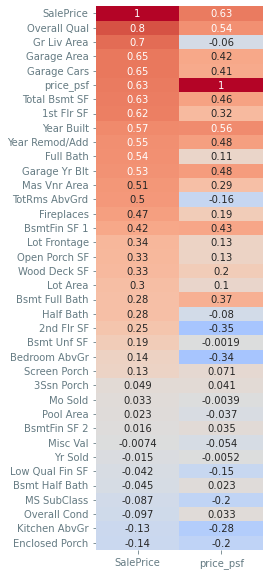

In [12]:
#Area correlation
plt.figure(figsize=(3,10))
#plt.rcParams['figure.constrained_layout.use'] = True
plt.style.use('Solarize_Light2')
plt.yticks(rotation = 45)
g = sns.heatmap(df_train.drop(labels=['Id','PID'], axis=1).corr()[['SalePrice','price_psf']].sort_values(by='SalePrice', ascending=False)
                , cmap='coolwarm', center=0, annot=True, cbar=False)
#g.set_xticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
#g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
;

Above is a correlation table between SalesPrice and price per square foot.
Best predictor of home value is Quality, followed by Gross Living Area. Age of property seems to play a factor as well.
As size of property is conventionally thought of to be a big factor in property prices, price per square foot based on Gross Living Area is calculated


<AxesSubplot:>

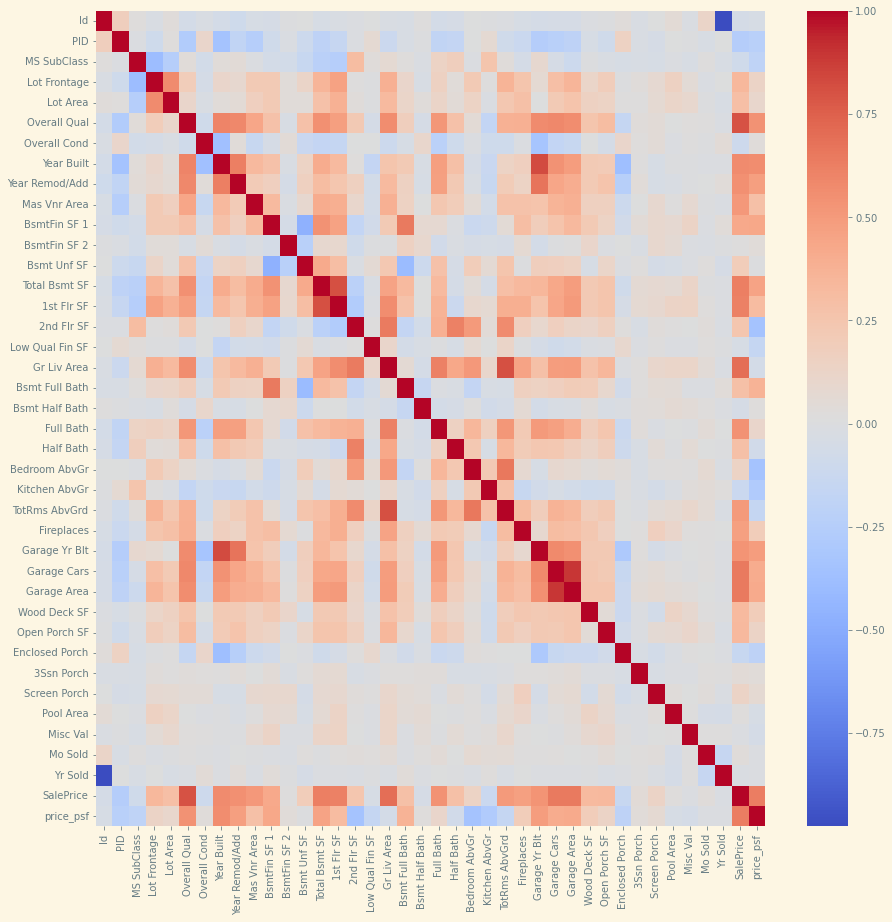

In [13]:
#slicer = col_group_updated['garage'] + ['SalePrice']
df_corr = df_train.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

<AxesSubplot:>

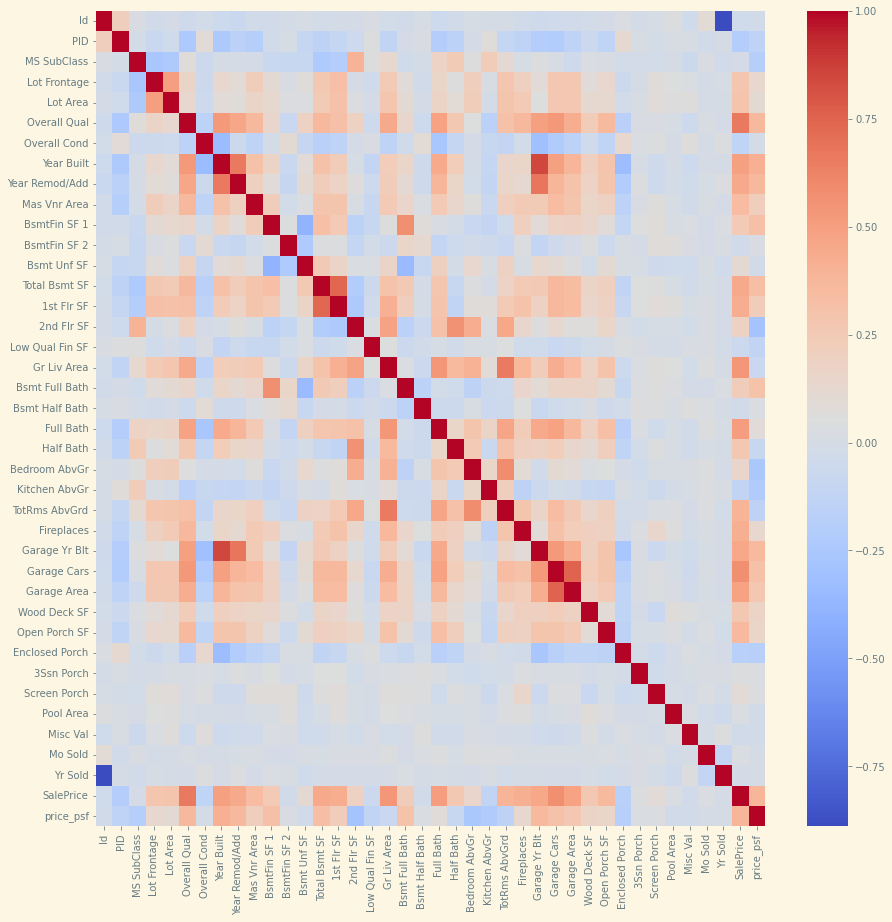

In [14]:
#slicer = col_group_updated['garage'] + ['SalePrice']
df_corr = df_train.corr(method='kendall')
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

<AxesSubplot:>

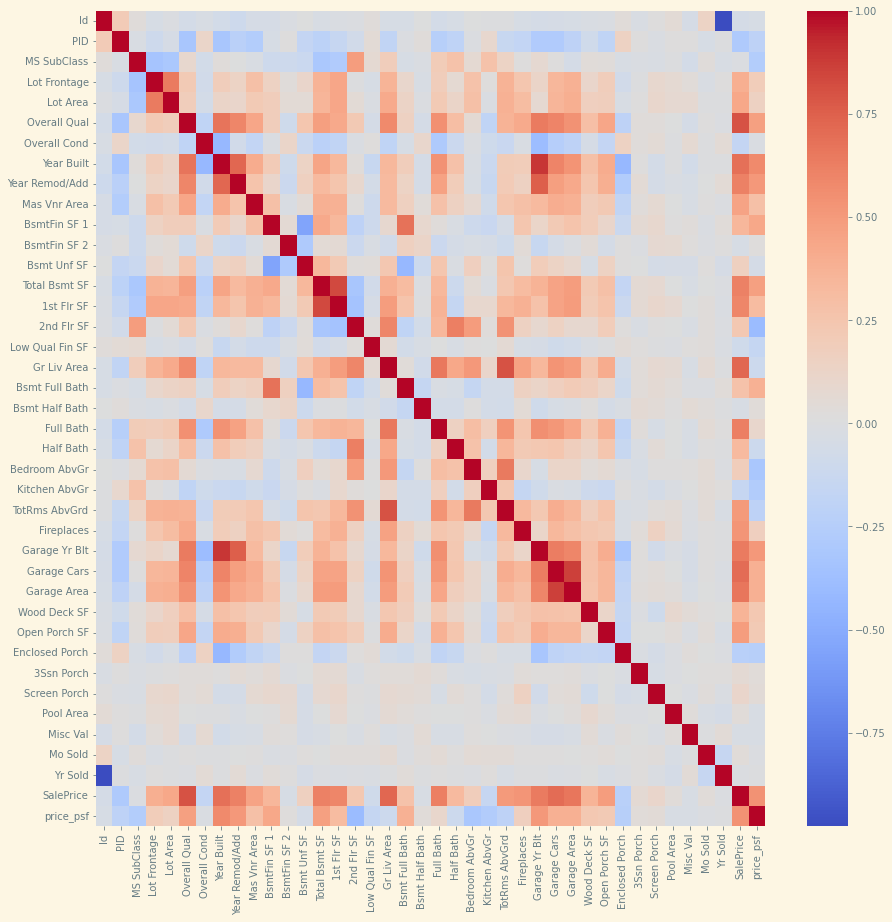

In [15]:
#slicer = col_group_updated['garage'] + ['SalePrice']
df_corr = df_train.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

In [16]:
df_combine = pd.concat([df_train, df_test], keys=['train','test'], sort=False)

In [17]:
df_combine.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
train 0  109  533352170           60        RL           NaN     13517   Pave   
      1  544  531379050           60        RL          43.0     11492   Pave   
      2  153  535304180           20        RL          68.0      7922   Pave   
      3  318  916386060           60        RL          73.0      9802   Pave   
      4  255  906425045           50        RL          82.0     14235   Pave   

        Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence  \
train 0   NaN       IR1          Lvl  ...         0     NaN   NaN   
      1   NaN       IR1          Lvl  ...         0     NaN   NaN   
      2   NaN       Reg          Lvl  ...         0     NaN   NaN   
      3   NaN       Reg          Lvl  ...         0     NaN   NaN   
      4   NaN       IR1          Lvl  ...         0     NaN   NaN   

        Misc Feature Misc Val Mo Sold Yr Sold Sale Type  SalePrice   price_psf  
train 0          NaN        0       3    2010       WD    130500.0   88.235294  
      1          NaN        0       4    2009       WD    220000.0  103.675778  
      2          NaN        0       1    2010       WD    109000.0  103.122044  
      3          NaN        0       4    2010       WD    174000.0  120.498615  
      4          NaN        0       3    2010       WD    138500.0   95.847751  

[5 rows x 82 columns]

In [18]:
category_columns = [key for key, val in df_train.iteritems() 
                    if df_train.dtypes[key] == 'object']
numerical_columns = [key for key, val in df_train.iteritems() 
                     if (df_train.dtypes[key] == 'int64') or (df_train.dtypes[key] == 'float64')]
print(len(category_columns))
print(len(numerical_columns))

42
40


Text(0.5, 1, 'Scatterplots of Numeric Features vs Price per Square Foot (Gross Living Area)')

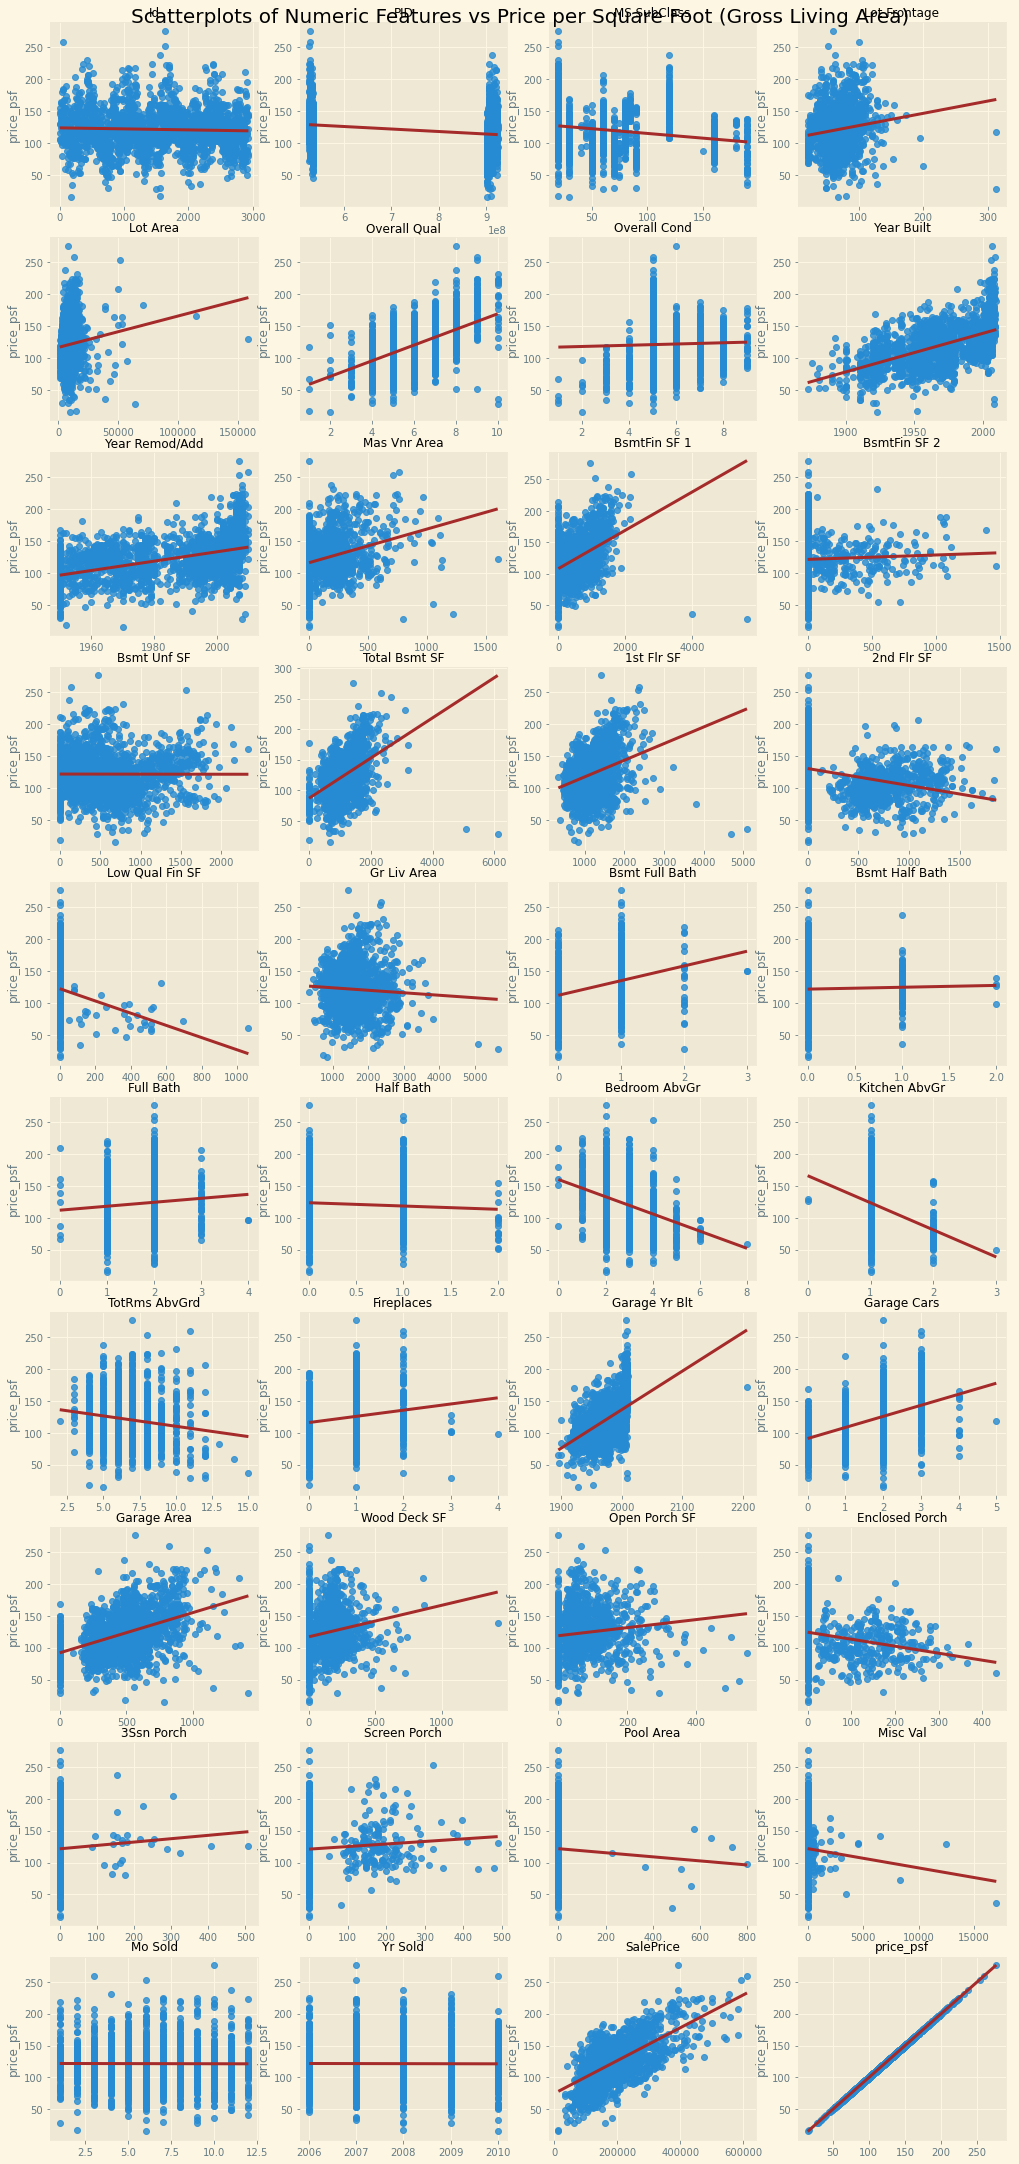

In [19]:
rows = round(len(numerical_columns)/4)
cols = 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(14, rows*3))
plt.tight_layout()

ax = ax.ravel()

for i, column in enumerate(numerical_columns):
    g = sns.regplot(data = df_train, x=column, y='price_psf', ax=ax[i], ci=None, line_kws={'color': 'brown'})
    ax[i].set_title(column,fontsize=12)
    ax[i].set_xlabel('')
fig.suptitle('Scatterplots of Numeric Features vs Price per Square Foot (Gross Living Area)', fontsize=20,y=1)    

#sns.regplot(data= df_train, x)

### Outliers

<AxesSubplot:xlabel='Lot Area', ylabel='price_psf'>

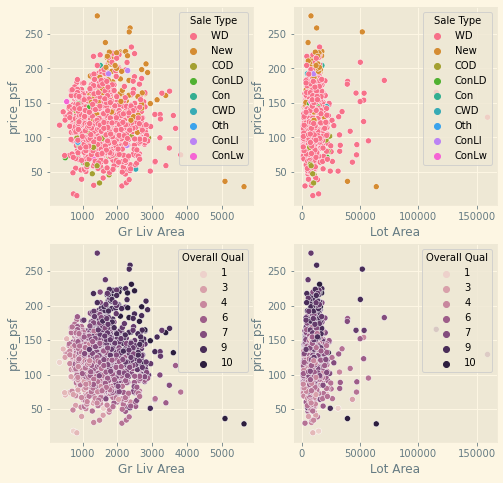

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

sns.scatterplot(data = df_train, x='Gr Liv Area', y='price_psf', ax=ax[0,0],
            hue='Sale Type')
sns.scatterplot(data = df_train, x='Lot Area', y='price_psf', ax=ax[0,1],
            hue='Sale Type')
sns.scatterplot(data = df_train, x='Gr Liv Area', y='price_psf', ax=ax[1,0],
            hue='Overall Qual')
sns.scatterplot(data = df_train, x='Lot Area', y='price_psf', ax=ax[1,1],
            hue='Overall Qual')


We see an unusual relationship here where properties with very large gross living area have unusually low price per square foot. this is even with a high quality score which we have established earlier to have high correlation with price per square foot.

As most of the data points in the training data are below 4000 Gr Liv Area, but in the test data there are a two data points with Gr Liv Area above 4000, I hypothesize that there is a size penalty for very big houses and it would be helpful to engineer a feature column for houses with Gr Liv Area above 4000 to account for this.

In [21]:
df_combine.loc[(df_combine['Gr Liv Area']>4000)|(df_combine['Lot Area']>100000),
               ['Lot Area','Gr Liv Area','SalePrice','price_psf','Overall Qual']]

Lot Area  Gr Liv Area  SalePrice   price_psf  Overall Qual
train 471     159000         2144   277000.0  129.197761             6
      694     115149         1824   302000.0  165.570175             7
      960      63887         5642   160000.0   28.358738            10
      1885     39290         5095   183850.0   36.084396            10
test  170      15623         4476        NaN         NaN            10
      213     215245         2036        NaN         NaN             7
      306     164660         1786        NaN         NaN             5
      463      21535         4316        NaN         NaN            10

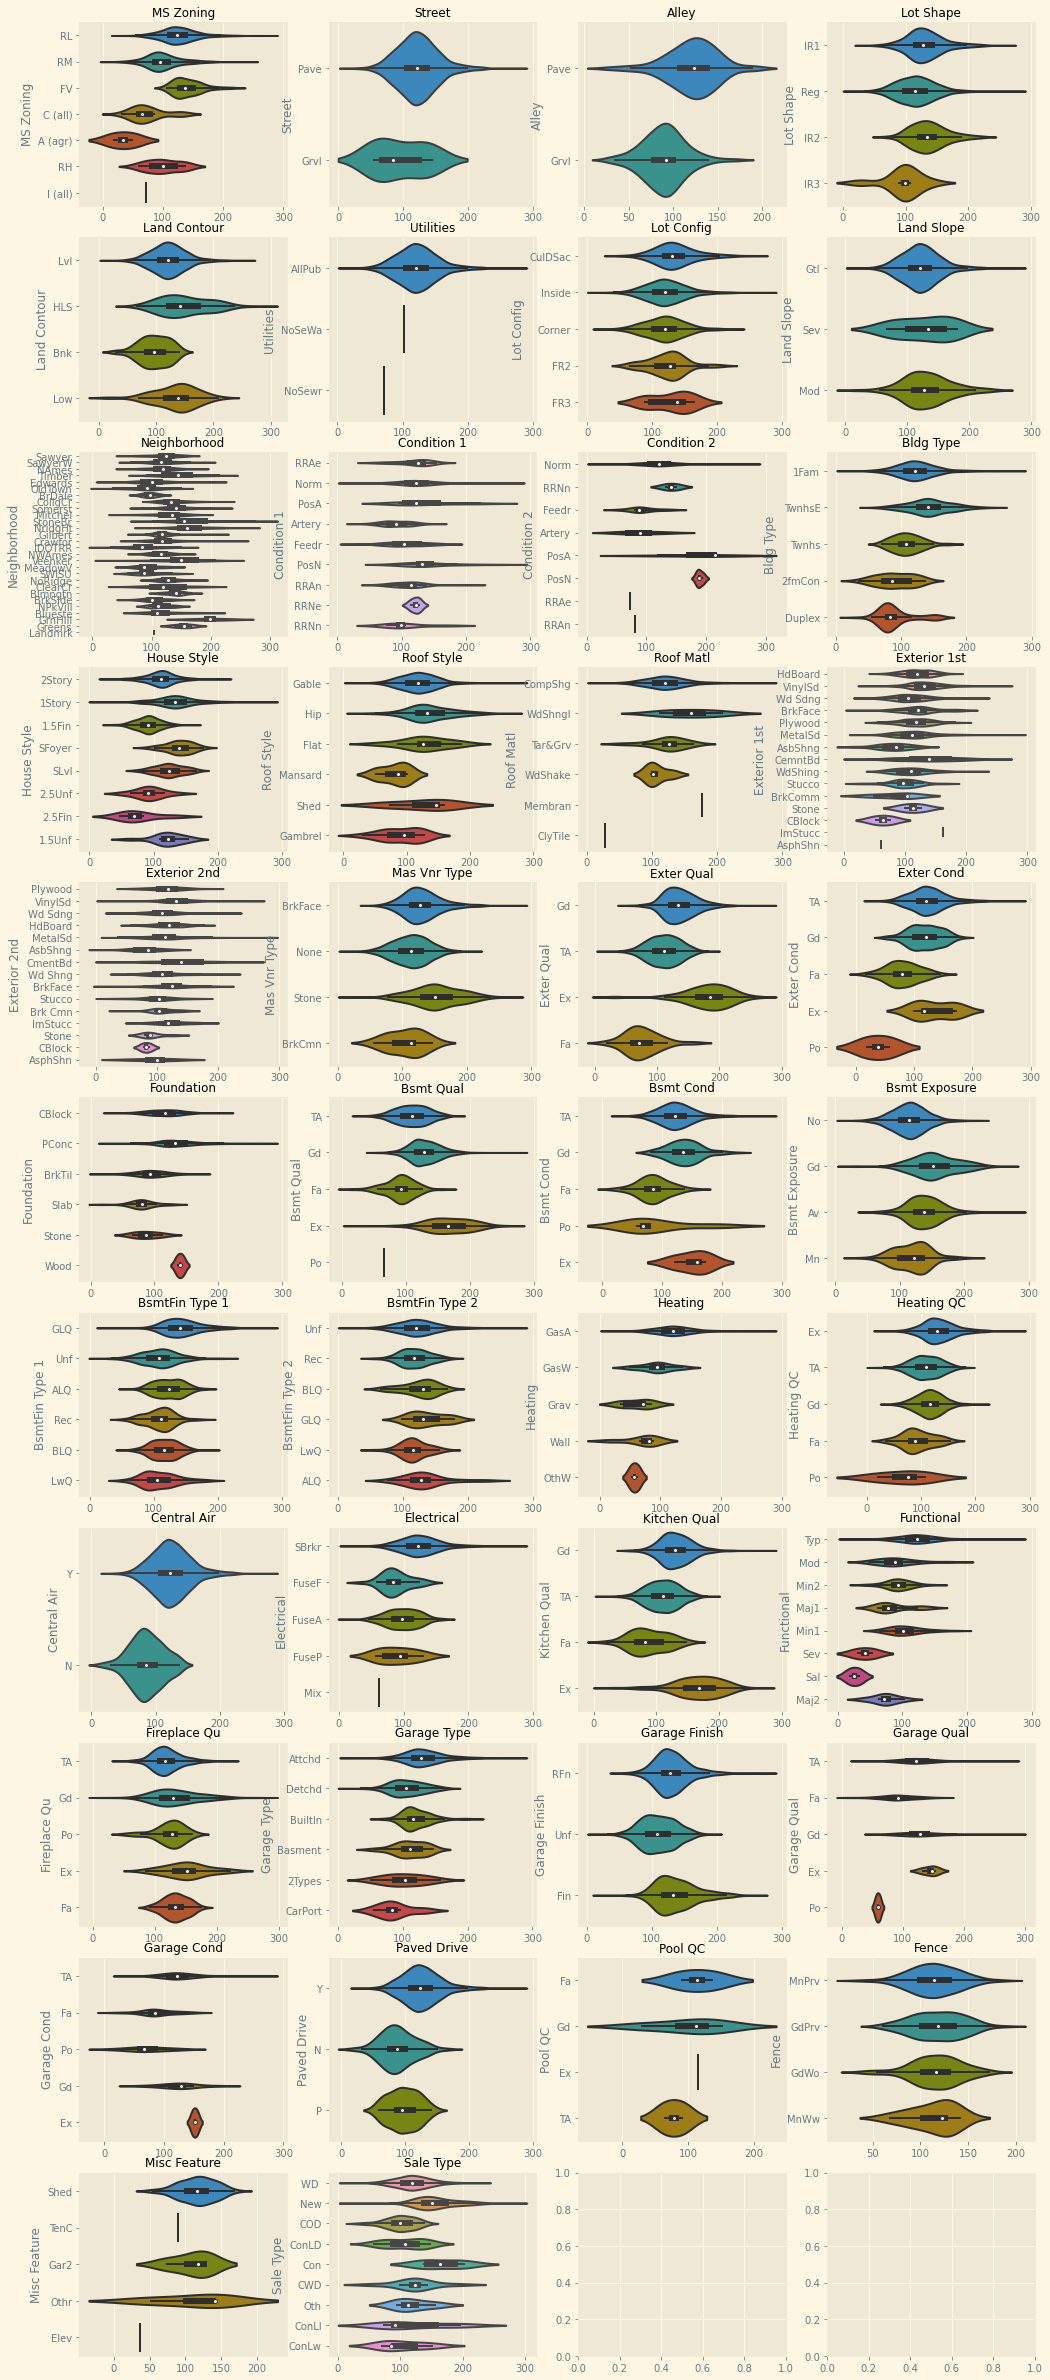

In [22]:
rows = round(len(category_columns)/4)+1
cols = 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(14, rows*3))
plt.tight_layout()

ax = ax.ravel()

for i, column in enumerate(category_columns):
    g = sns.violinplot(data = df_train, x='price_psf', y=column, ax=ax[i], orient='h')
    ax[i].set_title(column,fontsize=12)
    ax[i].set_xlabel('')

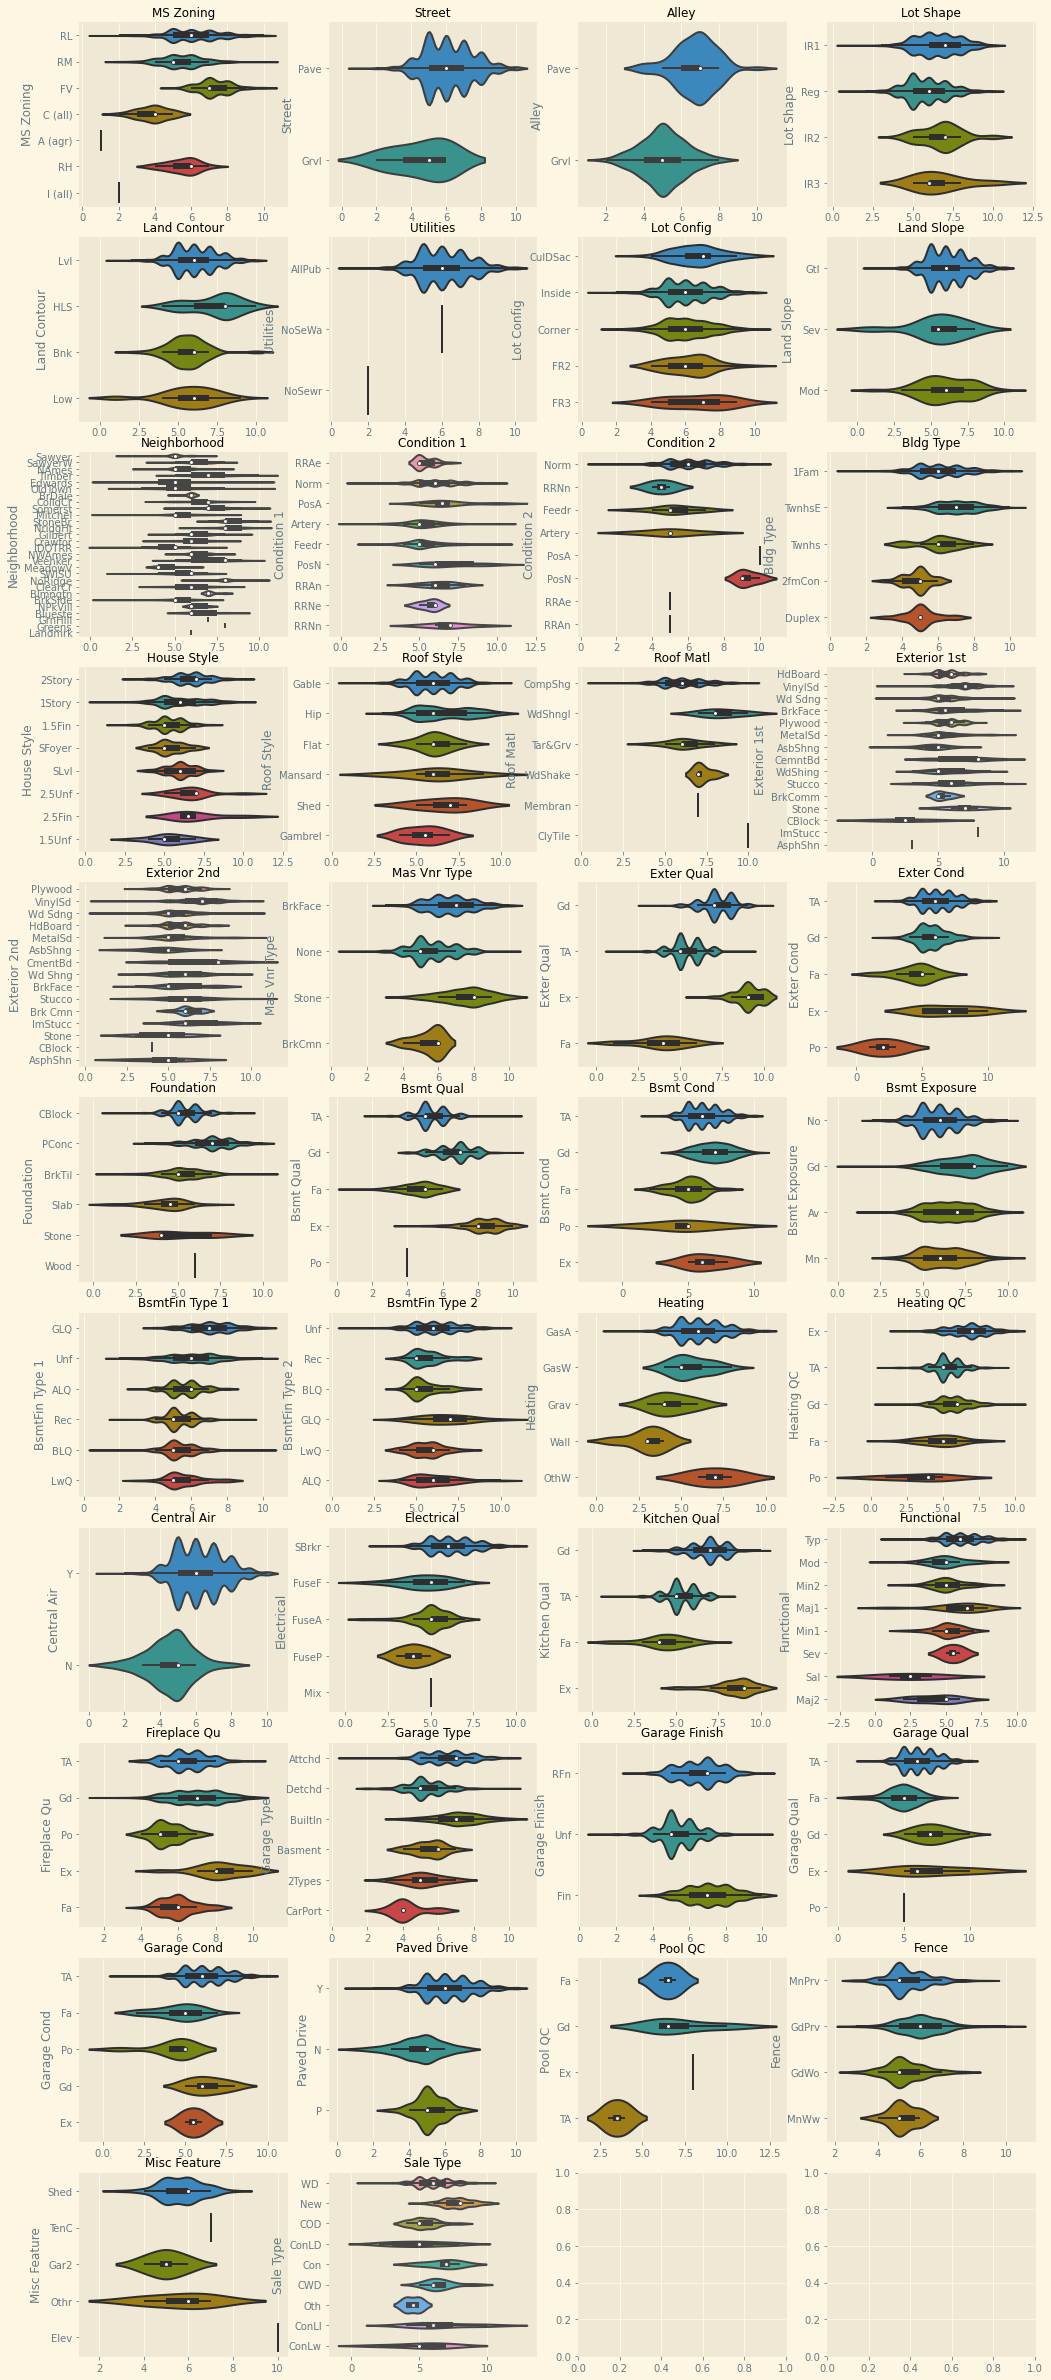

In [23]:
rows = round(len(category_columns)/4)+1
cols = 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(14, rows*3))
plt.tight_layout()

ax = ax.ravel()

for i, column in enumerate(category_columns):
    g = sns.violinplot(data = df_train, x='Overall Qual', y=column, ax=ax[i], orient='h')
    ax[i].set_title(column,fontsize=12)
    ax[i].set_xlabel('')


## Data Cleaning

In [27]:
display(df_combine.describe())

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2929.000000  2.929000e+03  2929.000000   2439.000000    2929.000000   
mean   1465.255377  7.143984e+08    57.386480     69.199672   10137.697849   
std     846.003265  1.887291e+08    42.645278     23.337677    7861.902406   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.000000  5.284770e+08    20.000000     58.000000    7440.000000   
50%    1465.000000  5.354532e+08    50.000000     68.000000    9434.000000   
75%    2198.000000  9.071811e+08    70.000000     80.000000   11553.000000   
max    2930.000000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2929.000000   2929.000000  2929.000000     2929.000000   2906.000000   
mean       6.093547      5.563332  1971.344145     1984.258450    101.669649   
std        1.409420      1.111678    30.243350       20.859235    178.724156   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Open Porch SF  Enclosed Porch   3Ssn Porch  Screen Porch  \
count  ...    2929.000000     2929.000000  2929.000000   2929.000000   
mean   ...      47.411062       23.019461     2.593377     16.007511   
std    ...      67.168919       64.148601    25.145578     56.096167   
min    ...       0.000000        0.000000     0.000000      0.000000   
25%    ...       0.000000        0.000000     0.000000      0.000000   
50%    ...      27.000000        0.000000     0.000000      0.000000   
75%    ...      70.000000        0.000000     0.000000      0.000000   
max    ...     742.000000     1012.000000   508.000000    576.000000   

         Pool Area      Misc Val      Mo Sold      Yr Sold      SalePrice  \
count  2929.000000   2929.000000  2929.000000  2929.000000    2051.000000   
mean      2.244111     50.652441     6.214749  2007.790714  181469.701609   
std      35.603235    566.440219     2.714055     1.316757   79258.659352   
min       0.000000      0.000000     1.000000  2006.000000   12789.000000   
25%       0.000000      0.000000     4.000000  2007.000000  129825.000000   
50%       0.000000      0.000000     6.000000  2008.000000  162500.000000   
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000   
max     800.000000  17000.000000    12.000000  2010.000000  611657.000000   

         price_psf  
count  2051.000000  
mean    121.685786  
std      32.312686  
min      15.371394  
25%     100.526788  
50%     120.413923  
75%     140.458218  
max     276.250881  

[8 rows x 40 columns]

### Investigate Null/Zero Values

In [28]:
null_series=df_combine.isnull().sum()

In [29]:
null_series=df_combine.isnull().sum()
display(null_series[null_series>0])
null_cols = null_series[null_series>0].index.tolist()

Lot Frontage       490
Alley             2731
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2916
Fence             2357
Misc Feature      2823
SalePrice          878
price_psf          878
dtype: int64

In [30]:
df_combine.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [31]:
#group columns by type
col_group = {'location': ['MS Zoning', 'Neighborhood', 'Condition 1', 'Condition 2',], 
             'land': ['Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 
                      'Lot Config', 'Land Slope'], 
             'structure': ['MS SubClass', 'Utilities', 'Bldg Type', 'House Style',  'Roof Style', 
                           'Foundation',  'Heating', 'Heating QC', 'Central Air', 'Electrical', 
                           'Fireplaces', 'Fireplace Qu','Functional'], 
             'finishings': ['Overall Qual', 'Overall Cond', 'Roof Matl', 'Exterior 1st', 
                            'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Type','Mas Vnr Area', 
                            'Exter Qual', 'Exter Cond'], 
             'liv_area': ['1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 
                          'Half Bath', 'Bedroom AbvGr','Kitchen AbvGr', 'Kitchen Qual', 
                          'TotRms AbvGrd',],
             'basement': ['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
                          'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
                          'Bsmt Full Bath','Bsmt Half Bath',], 
             'garage': ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 
                        'Garage Area', 'Garage Qual','Garage Cond'], 
             'external': ['Paved Drive', 'Wood Deck SF', 'Open Porch SF','Enclosed Porch', 
                          '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC','Fence', 
                          'Misc Feature', 'Misc Val'], 
             'age_sale': ['Year Built', 'Year Remod/Add', 'Mo Sold', 'Yr Sold', 'Sale Type', 
                          'SalePrice']}

In [32]:
#check number of items in col_group dict
x = 0
for items in col_group.values():
    x = x + len(items)
print(x)
print(len(df_combine.columns))

80
82


In [33]:
#lot_frontage

In [34]:
df_combine[df_combine[col_group['land']].isna().any(axis=1)][col_group['land']]

Lot Frontage  Lot Area Street Alley Lot Shape Land Contour  \
train 0             NaN     13517   Pave   NaN       IR1          Lvl   
      1            43.0     11492   Pave   NaN       IR1          Lvl   
      2            68.0      7922   Pave   NaN       Reg          Lvl   
      3            73.0      9802   Pave   NaN       Reg          Lvl   
      4            82.0     14235   Pave   NaN       IR1          Lvl   
...                 ...       ...    ...   ...       ...          ...   
test  873          80.0      8000   Pave   NaN       Reg          Lvl   
      874          90.0     14670   Pave   NaN       Reg          Lvl   
      875          55.0      8250   Pave   NaN       Reg          Lvl   
      876          60.0      9000   Pave   NaN       Reg          Lvl   
      877          70.0      8400   Pave   NaN       Reg          Lvl   

          Lot Config Land Slope  
train 0      CulDSac        Gtl  
      1      CulDSac        Gtl  
      2       Inside        Gtl  
      3       Inside        Gtl  
      4       Inside        Gtl  
...              ...        ...  
test  873     Inside        Gtl  
      874     Inside        Gtl  
      875     Inside        Gtl  
      876        FR2        Gtl  
      877     Corner        Gtl  

[2744 rows x 8 columns]

In [35]:
df_combine[df_combine[col_group['structure']].isna().any(axis=1)][col_group['structure']]
df_combine.groupby(['Fireplaces','Fireplace Qu'],dropna=False).size().reset_index().rename(columns={0:'count'})

Fireplaces Fireplace Qu  count
0            0          NaN   1422
1            1           Ex     37
2            1           Fa     64
3            1           Gd    626
4            1           Po     46
5            1           TA    500
6            2           Ex      5
7            2           Fa     10
8            2           Gd    112
9            2           TA     94
10           3           Ex      1
11           3           Fa      1
12           3           Gd      5
13           3           TA      5
14           4           TA      1

In [36]:
df_combine[df_combine[col_group['finishings']].isna().any(axis=1)][col_group['finishings']]
df_combine.groupby([ 'Mas Vnr Type','Mas Vnr Area'],dropna=False
                  ).size().reset_index().rename(columns={0:'count'})

Mas Vnr Type  Mas Vnr Area  count
0         BrkCmn          40.0      1
1         BrkCmn          41.0      1
2         BrkCmn          54.0      1
3         BrkCmn          58.0      2
4         BrkCmn          66.0      1
..           ...           ...    ...
588        Stone         796.0      1
589        Stone         860.0      1
590        Stone         902.0      1
591        Stone        1224.0      1
592          NaN           NaN     23

[593 rows x 3 columns]

In [37]:
#select rows with null values
df_basement_nan = df_combine[df_combine[col_group['basement']].isna().any(axis=1)][col_group['basement']]
#sum measures of area
df_basement_nan['sumsqft'] = df_basement_nan['BsmtFin SF 1'] + df_basement_nan['BsmtFin SF 2'] + df_basement_nan['Total Bsmt SF']
#select rows where sum of area measures is not equal to zero to validate that there is no basement
df_basement_nan[df_basement_nan['sumsqft'] != 0]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
train 1147        Gd        TA            No            GLQ        1124.0   
      1327       NaN       NaN           NaN            NaN           NaN   
      1456        Gd        TA           NaN            Unf           0.0   
      1547        Gd        TA           NaN            Unf           0.0   
      1997        Gd        TA           NaN            Unf           0.0   

           BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
train 1147            NaN         479.0       1603.0         3206.0   
      1327            NaN           NaN          NaN            NaN   
      1456            Unf           0.0        725.0          725.0   
      1547            Unf           0.0       1595.0         1595.0   
      1997            Unf           0.0        936.0          936.0   

            Bsmt Full Bath  Bsmt Half Bath  sumsqft  
train 1147             1.0             0.0   4809.0  
      1327             NaN             NaN      NaN  
      1456             0.0             0.0    725.0  
      1547             0.0             0.0   1595.0  
      1997             0.0             0.0    936.0

In [38]:
df_combine.loc[[('train',1147)],'BsmtFin Type 2']

train  1147    NaN
Name: BsmtFin Type 2, dtype: object

In [39]:
# additional issue here is we see some 'Unf' bsmtfin_types as zero square foot 
# for _1 and _2 when unf_sf has values. just using the total columns, 
# bsmt_unf_sf and total_bsmt_sf, would still capture this information so we would

In [40]:
df_combine.groupby(['BsmtFin Type 1','BsmtFin Type 2'],dropna=False
                  ).size().reset_index().rename(columns={0:'count'})
#since its clear that type_2 for 1147 is not unfinished or nan from the squarefoot columns, 
#we would assign the value 'Rec', as to the modal value for those with GLQ as type_1 after 'Unf', 
#to replace NaN 

BsmtFin Type 1 BsmtFin Type 2  count
0             ALQ            BLQ     30
1             ALQ            GLQ      3
2             ALQ            LwQ     27
3             ALQ            Rec     36
4             ALQ            Unf    333
5             BLQ            ALQ      4
6             BLQ            BLQ      1
7             BLQ            GLQ     10
8             BLQ            LwQ     23
9             BLQ            Rec     34
10            BLQ            Unf    197
11            GLQ            ALQ     16
12            GLQ            BLQ      7
13            GLQ            LwQ     19
14            GLQ            Rec     20
15            GLQ            Unf    795
16            GLQ            NaN      1
17            LwQ            ALQ     14
18            LwQ            BLQ     11
19            LwQ            GLQ     14
20            LwQ            Rec     16
21            LwQ            Unf     99
22            Rec            ALQ     19
23            Rec            BLQ     19
24            Rec            GLQ      7
25            Rec            LwQ     20
26            Rec            Unf    223
27            Unf            Unf    851
28            NaN            NaN     80

In [41]:
df_garage_nan = df_combine[df_combine[col_group['garage']].isna().any(axis=1)][col_group['garage']]
df_garage_nan.info()
#theres one row with nans that have

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 159 entries, ('train', 28) to ('test', 859)
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    2 non-null      object 
 1   Garage Yr Blt  0 non-null      float64
 2   Garage Finish  0 non-null      object 
 3   Garage Cars    158 non-null    float64
 4   Garage Area    158 non-null    float64
 5   Garage Qual    0 non-null      object 
 6   Garage Cond    0 non-null      object 
dtypes: float64(3), object(4)
memory usage: 89.9+ KB


In [42]:
df_garage_nan[(df_garage_nan['Garage Area']!=0) | 
              (df_garage_nan['Garage Cars']!=0) ]
#imputing train,1712 with most common values. not imputing test dataset 

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
train 1712      Detchd            NaN           NaN          NaN          NaN   
test  764       Detchd            NaN           NaN          1.0        360.0   

           Garage Qual Garage Cond  
train 1712         NaN         NaN  
test  764          NaN         NaN

In [43]:
df_combine.loc[df_combine['Garage Type']=='Detchd',col_group['garage']].describe()
#impute average for garage_cars & garage_area

Garage Yr Blt  Garage Cars  Garage Area
count     780.000000   781.000000   781.000000
mean     1961.302564     1.549296   419.740077
std        27.079178     0.572166   174.435942
min      1895.000000     1.000000   100.000000
25%      1939.000000     1.000000   280.000000
50%      1962.000000     2.000000   400.000000
75%      1981.000000     2.000000   528.000000
max      2009.000000     5.000000  1488.000000

In [44]:
df_combine.loc[('train', 1712), 'Year Built']

1923

In [45]:
df_combine[df_combine[col_group['external']].isna().any(axis=1)][col_group['external']]

Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  \
train 0             Y             0             44               0   
      1             Y             0             74               0   
      2             Y             0             52               0   
      3             Y           100              0               0   
      4             N             0             59               0   
...               ...           ...            ...             ...   
test  873           Y             0             96               0   
      874           Y             0            230               0   
      875           Y             0             63               0   
      876           Y             0              0               0   
      877           Y            81              0               0   

           3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  \
train 0             0             0          0     NaN    NaN          NaN   
      1             0             0          0     NaN    NaN          NaN   
      2             0             0          0     NaN    NaN          NaN   
      3             0             0          0     NaN    NaN          NaN   
      4             0             0          0     NaN    NaN          NaN   
...               ...           ...        ...     ...    ...          ...   
test  873           0             0          0     NaN    NaN          NaN   
      874           0             0          0     NaN  MnPrv          NaN   
      875           0             0          0     NaN    NaN          NaN   
      876           0             0          0     NaN   GdWo          NaN   
      877           0             0          0     NaN   GdWo          NaN   

           Misc Val  
train 0           0  
      1           0  
      2           0  
      3           0  
      4           0  
...             ...  
test  873         0  
      874         0  
      875         0  
      876         0  
      877         0  

[2928 rows x 11 columns]

In [46]:
#generate counts of categorical values in columns with dtype=object
categories = {key: val.value_counts(dropna=False, normalize=True) for key, val in df_combine.iteritems() if df_combine.dtypes[key] == 'object'}
categories

{'MS Zoning': RL         0.775691
 RM         0.157733
 FV         0.047456
 RH         0.009218
 C (all)    0.008535
 A (agr)    0.000683
 I (all)    0.000683
 Name: MS Zoning, dtype: float64,
 'Street': Pave    0.995903
 Grvl    0.004097
 Name: Street, dtype: float64,
 'Alley': NaN     0.93240
 Grvl    0.04097
 Pave    0.02663
 Name: Alley, dtype: float64,
 'Lot Shape': Reg    0.634688
 IR1    0.333902
 IR2    0.025947
 IR3    0.005463
 Name: Lot Shape, dtype: float64,
 'Land Contour': Lvl    0.898942
 HLS    0.040970
 Bnk    0.039604
 Low    0.020485
 Name: Land Contour, dtype: float64,
 'Utilities': AllPub    0.998976
 NoSewr    0.000683
 NoSeWa    0.000341
 Name: Utilities, dtype: float64,
 'Lot Config': Inside     0.730283
 Corner     0.174462
 CulDSac    0.061454
 FR2        0.029020
 FR3        0.004780
 Name: Lot Config, dtype: float64,
 'Land Slope': Gtl    0.951861
 Mod    0.042677
 Sev    0.005463
 Name: Land Slope, dtype: float64,
 'Neighborhood': NAmes      0.151246
 Coll

### Data Cleaning & Feature Engineering

In [47]:
def large_house(df):
    '''Adds a boolean category for Gr Liv Area larger than 4000'''
    df['large_house'] = df['Gr Liv Area']>4000
large_house(df_combine)

In [49]:
def fill_nan_values(df):
    df.loc[('train',1147),'BsmtFin Type 2'] = 'Rec'
    garage_col = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 
                  'Garage Area', 'Garage Qual','Garage Cond']
    replace_1712 = ['Attchd', 1923, 1923, 1.549296,
                     419.740077, 'TA', 'TA']
    df.loc[('train',1712),garage_col] = replace_1712
    
fill_nan_values(df_combine)

In [50]:
def age_at_sale(df):
    '''Calculates ages of property, renovation and garage at point of sale'''
    df['yr_since_built'] = df['Yr Sold'] - df['Year Built']
    df['yr_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df['yr_since_garage'] = df['Yr Sold'] - df['Garage Yr Blt']
age_at_sale(df_combine)

In [51]:
def calculate_basement_fin_sf(df):
    '''calculates finished square foot area of basement from total and unfinished and drops total'''
    df['bsmt_fin_sf'] = df['Total Bsmt SF'] - df['Bsmt Unf SF']
    df.drop(labels = ['Total Bsmt SF'], axis=1, inplace=True)
calculate_basement_fin_sf(df_combine)

In [52]:
null_series=df_combine.isnull().sum()
display(null_series[null_series>0])
null_cols = null_series[null_series>0].index.tolist()

Lot Frontage        490
Alley              2731
Mas Vnr Type         23
Mas Vnr Area         23
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       80
BsmtFin SF 2          1
Bsmt Unf SF           1
Electrical            1
Bsmt Full Bath        2
Bsmt Half Bath        2
Fireplace Qu       1422
Garage Type         157
Garage Yr Blt       158
Garage Finish       158
Garage Qual         158
Garage Cond         158
Pool QC            2916
Fence              2357
Misc Feature       2823
SalePrice           878
price_psf           878
yr_since_garage     158
bsmt_fin_sf           1
dtype: int64

In [53]:
def string_to_ordinal(df):
    '''convert ordinal string categories to numerical values'''
    dict1 = {'Reg':  0, 'IR1':   -1, 'IR2':   -2, 'IR3':   -3}
    df['Lot Shape'].replace(dict1, inplace=True)

    dict2={'Gtl':   0, 'Mod':   -1, 'Sev':   -2,}
    df['Land Slope'].replace(dict2, inplace=True)

    dict3={'Ex':3, 'Gd':2, 'TA':1, 'Fa':-1, 'Po':-2, np.NaN:0}
    dict3_lists= ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond','Heating QC', 'Kitchen Qual', 
    'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']
    for i in dict3_lists:
        df[i].replace(dict3, inplace=True)

    dict4={'Gd':2, 'Av':1, 'Mn':-1,'No':-2}
    df['Bsmt Exposure'].replace(dict4, inplace=True)

    dict5= {'GLQ':   3,
     'ALQ':   2,
     'Rec':   -1,
     'BLQ':   1,
     'LwQ':   -2,
     'Unf':   -3,
     np.NaN:0 }
    dict5_lists = ['BsmtFin Type 1' ,'BsmtFin Type 2']
    for i in dict5_lists:
        df[i].replace(dict5, inplace=True)

    dict6= {'SBrkr':   0,
     'FuseA':   -1,
     'FuseF' :   -2,
     'FuseP'  :  -3,
     'Mix'    :  -4,
     np.NaN:0
           }
    df['Electrical'].replace(dict6, inplace=True)

    dict7= {'Typ'  :   3,
     'Min2'  :  1,
     'Min1'  :  2,
     'Mod'   :  0,
     'Maj1'  :  -1,
     'Maj2'  :  -2,
     'Sev'   :  -3,
     'Sal'   :  -4}
    df['Functional'].replace(dict7, inplace=True)

    dict8= {'Unf' :    -2,
     'RFn' :    -1,
     'Fin'  :   1,
     np.NaN:0 
           }
    df['Garage Finish'].replace(dict8, inplace=True)

    dict9={'Y' :   0,
     'N'  :  -1,
     'P'  :  -2}
    df['Paved Drive'].replace(dict9, inplace=True)

    dict10={ 'MnPrv' :   3,
     'GdPrv' :   4,
     'GdWo'  :   2,
     'MnWw'  :   1,}
    df['Fence'].replace(dict10, inplace=True)

string_to_ordinal(df_combine)

In [54]:
def convert_nan(df):
    '''Fill NaN values in object dtype columns as string 'none' 
    and int 0 in float64 and int64 columns'''
    null_cols.remove('Lot Frontage')
    for i in null_cols:
        if df[i].dtypes == 'O':
            df[i].fillna('none', inplace=True)
        if df[i].dtypes == 'float64':
            df[i].fillna(0, inplace=True)
        if df[i].dtypes == 'int64':
            df[i].fillna(0, inplace=True)
convert_nan(df_combine) 
#Dummify categorical variables

In [55]:
null_series = df_combine.isna().sum()
null_series[null_series>0]

Lot Frontage    490
dtype: int64

In [56]:
def fix_typo_exterior(df):
    typo_dict = {'Wd Shng' : 'WdShing', 
                 'Brk Cmn' : 'BrkComm', 
                 'CmentBd' : 'CemntBd'
                }
    df['Exterior 2nd'].replace(typo_dict, inplace=True)
fix_typo_exterior(df_combine)

In [57]:
df_combine['Exterior 1st'].value_counts(dropna=False)
#categories = {key: val.value_counts(dropna=False, normalize=True) for key, val in df_combine.iteritems() if df_combine.dtypes[key] == 'object'}
#categories

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     125
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
PreCast       1
Name: Exterior 1st, dtype: int64

In [58]:
def combine_cat_dummies(df, col1, col2, comb_name):
    '''
    combines two related categorical categories into dummy columns and drops category with largest count
    df - dataframe to use
    col1 - name of first column to combine
    col2 - name of second column to combine
    comb_name - prefix to use for dummy columns
    '''
    #get dummies for columns and generate list of unique columns that correspond to the categorical variables
    col1_dum = pd.get_dummies(df[col1], prefix=comb_name, dummy_na=True)
    col2_dum = pd.get_dummies(df[col2], prefix=comb_name, dummy_na=True)
    combined_cat = list(col1_dum.columns) + list(col2_dum.columns) # creates combined list of dummy columns
    combined_cat = list(dict.fromkeys(combined_cat)) #removes duplicates in list

    #performs category wise Or operation on matching columns from each dummy array 
    col_dict={}
    for i in combined_cat: 
        col_dict[i]=np.logical_or(col1_dum.get(i,default=False),col2_dum.get(i,default=False)).tolist()
    combined_dum = pd.DataFrame.from_dict(col_dict)
    
    #drops dummy column with the most True values to get K-1 category levels
    sum_col = combined_dum.sum(axis=0)
    max_col = sum_col[sum_col == sum_col.max()].index[0]
    return combined_dum.drop(max_col, axis=1)
    
condition_comb_dummies = combine_cat_dummies(df_combine,'Condition 1', 'Condition 2','condition')
exterior_comb_dummies = combine_cat_dummies(df_combine, 'Exterior 1st', 'Exterior 2nd', 'exterior')

In [59]:
condition_comb_dummies.head()

condition_Artery  condition_Feedr  condition_PosA  condition_PosN  \
0             False            False           False           False   
1             False            False           False           False   
2             False            False           False           False   
3             False            False           False           False   
4             False            False           False           False   

   condition_RRAe  condition_RRAn  condition_RRNe  condition_RRNn  \
0            True           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   condition_nan  
0          False  
1          False  
2          False  
3          False  
4          False

In [60]:
exterior_comb_dummies.head()

exterior_AsbShng  exterior_AsphShn  exterior_BrkComm  exterior_BrkFace  \
0             False             False             False             False   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   exterior_CBlock  exterior_CemntBd  exterior_HdBoard  exterior_ImStucc  \
0            False             False              True             False   
1            False             False             False             False   
2            False             False             False             False   
3            False             False             False             False   
4            False             False             False             False   

   exterior_MetalSd  exterior_Plywood  exterior_PreCast  exterior_Stone  \
0             False              True             False           False   
1             False             False             False           False   
2             False             False             False           False   
3             False             False             False           False   
4             False              True             False           False   

   exterior_Stucco  exterior_Wd Sdng  exterior_WdShing  exterior_nan  \
0            False             False             False         False   
1            False             False             False         False   
2            False             False             False         False   
3            False             False             False         False   
4            False              True             False         False   

   exterior_Other  
0           False  
1           False  
2           False  
3           False  
4           False

In [61]:
condition_comb_dummies.shape
df_combine.shape
exterior_comb_dummies.shape

comb_dummies = pd.concat([condition_comb_dummies,exterior_comb_dummies],
                         axis=1)
comb_dummies.set_index(df_combine.index, inplace=True)
df_combine = df_combine.join(comb_dummies);



In [62]:
comb_dummies.columns

Index(['condition_Artery', 'condition_Feedr', 'condition_PosA',
       'condition_PosN', 'condition_RRAe', 'condition_RRAn', 'condition_RRNe',
       'condition_RRNn', 'condition_nan', 'exterior_AsbShng',
       'exterior_AsphShn', 'exterior_BrkComm', 'exterior_BrkFace',
       'exterior_CBlock', 'exterior_CemntBd', 'exterior_HdBoard',
       'exterior_ImStucc', 'exterior_MetalSd', 'exterior_Plywood',
       'exterior_PreCast', 'exterior_Stone', 'exterior_Stucco',
       'exterior_Wd Sdng', 'exterior_WdShing', 'exterior_nan',
       'exterior_Other'],
      dtype='object')

In [64]:
list(df_combine.columns)

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual'

In [65]:
df_combine.loc['train']

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley  Lot Shape Land Contour  ... exterior_ImStucc exterior_MetalSd  \
0     none         -1          Lvl  ...            False            False   
1     none         -1          Lvl  ...            False            False   
2     none          0          Lvl  ...            False            False   
3     none          0          Lvl  ...            False            False   
4     none         -1          Lvl  ...            False            False   
...    ...        ...          ...  ...              ...              ...   
2046  none         -1          HLS  ...            False            False   
2047  none         -1          Lvl  ...            False            False   
2048  none          0          Bnk  ...            False            False   
2049  none          0          Lvl  ...            False            False   
2050  none          0          Lvl  ...            False            False   

      exterior_Plywood exterior_PreCast exterior_Stone exterior_Stucco  \
0                 True            False          False           False   
1                False            False          False           False   
2                False            False          False           False   
3                False            False          False           False   
4                 True            False          False           False   
...                ...              ...            ...             ...   
2046             False            False          False           False   
2047             False            False          False           False   
2048             False            False           True           False   
2049              True            False          False           False   
2050             False            False          False           False   

     exterior_Wd Sdng exterior_WdShing  exterior_nan  exterior_Other  
0               False            False         False           False  
1               False            False         False           False  
2               False            False         False           False  
3               False            False         False           False  
4                True            False         False           False  
...               ...              ...           ...             ...  
2046            False            False         False           False  
2047            False            False         False           False  
2048            False            False         False           False  
2049            False            False         False           False  
2050            False            False         False           False  

[2051 rows x 112 columns]

In [66]:
df_train_temp = df_combine.loc['train',:]
df_train_temp['lot_frontage_ratio'] = df_train_temp.loc[:,'Lot Frontage'] / df_train_temp.loc[:,'Lot Area']
display(df_train_temp.groupby('Lot Config')['lot_frontage_ratio'].describe())
mean_by_config = df_train_temp.groupby('Lot Config')['lot_frontage_ratio'].mean()


C:\Users\deang\AppData\Local\Temp\ipykernel_14972\3871021338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_temp['lot_frontage_ratio'] = df_train_temp.loc[:,'Lot Frontage'] / df_train_temp.loc[:,'Lot Area']


count      mean       std       min       25%       50%  \
Lot Config                                                             
Corner       281.0  0.008506  0.002622  0.004438  0.007272  0.008195   
CulDSac       70.0  0.004403  0.002101  0.000878  0.003149  0.003782   
FR2           49.0  0.006893  0.002271  0.002376  0.005282  0.007111   
FR3            8.0  0.008871  0.003344  0.005714  0.007534  0.007844   
Inside      1313.0  0.008013  0.002239  0.000876  0.006667  0.007812   

                 75%       max  
Lot Config                      
Corner      0.009154  0.037154  
CulDSac     0.005159  0.009964  
FR2         0.008299  0.010526  
FR3         0.008668  0.016667  
Inside      0.008696  0.022708

In [67]:
# lot frontage
df_combine['lot_frontage_ratio'] = df_combine['Lot Frontage'] / df_combine['Lot Area']
df_combine['lot_frontage_ratio'].fillna(df_combine['Lot Config'].map(mean_by_config), inplace=True)
df_combine['lot_frontage_est'] = df_combine['Lot Area'] * df_combine['lot_frontage_ratio']
df_combine.head()
#def convert_lot_frontage(df):

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
train 0  109  533352170           60        RL           NaN     13517   Pave   
      1  544  531379050           60        RL          43.0     11492   Pave   
      2  153  535304180           20        RL          68.0      7922   Pave   
      3  318  916386060           60        RL          73.0      9802   Pave   
      4  255  906425045           50        RL          82.0     14235   Pave   

        Alley  Lot Shape Land Contour  ... exterior_Plywood exterior_PreCast  \
train 0  none         -1          Lvl  ...             True            False   
      1  none         -1          Lvl  ...            False            False   
      2  none          0          Lvl  ...            False            False   
      3  none          0          Lvl  ...            False            False   
      4  none         -1          Lvl  ...             True            False   

         exterior_Stone exterior_Stucco exterior_Wd Sdng exterior_WdShing  \
train 0           False           False            False            False   
      1           False           False            False            False   
      2           False           False            False            False   
      3           False           False            False            False   
      4           False           False             True            False   

        exterior_nan exterior_Other  lot_frontage_ratio  lot_frontage_est  
train 0        False          False            0.004403         59.516825  
      1        False          False            0.003742         43.000000  
      2        False          False            0.008584         68.000000  
      3        False          False            0.007447         73.000000  
      4        False          False            0.005760         82.000000  

[5 rows x 114 columns]

In [68]:
def sum_porch_area(df):
    '''Sums porch area of various types and convert column values to binary'''
    porch = ['wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch']
    df[porch_area] = df[porch].sum(axis=1)

In [69]:
porch = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']
df_combine['porch_area'] = df_combine[porch].sum(axis=1)

df_combine['wood_deck'] = df_combine['Wood Deck SF'].astype('bool')
df_combine['open_porch'] = df_combine['Open Porch SF'].astype('bool')
df_combine['enclosed_porch'] = df_combine['Enclosed Porch'].astype('bool')
df_combine['3ssn_porch'] = df_combine['3Ssn Porch'].astype('bool')
df_combine['screen_porch'] = df_combine['Screen Porch'].astype('bool')

cols = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
        'porch_area','wood_deck','open_porch','enclosed_porch','3ssn_porch', 'screen_porch']
df_combine[cols].head()


Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
train 0             0             44               0           0   
      1             0             74               0           0   
      2             0             52               0           0   
      3           100              0               0           0   
      4             0             59               0           0   

         Screen Porch  porch_area  wood_deck  open_porch  enclosed_porch  \
train 0             0          44      False        True           False   
      1             0          74      False        True           False   
      2             0          52      False        True           False   
      3             0         100       True       False           False   
      4             0          59      False        True           False   

         3ssn_porch  screen_porch  
train 0       False         False  
      1       False         False  
      2       False         False  
      3       False         False  
      4       False         False

In [70]:
null_series = df_combine.isna().sum()
null_series[null_series>0]

Lot Frontage    490
dtype: int64

In [71]:
categories = {key: val.value_counts(dropna=False, normalize=True) 
              for key, val in df_combine.iteritems() if df_combine.dtypes[key] == 'object'}
to_dummify=list(categories.keys())
to_remove = ['Condition 1', 'Condition 2','Exterior 1st', 'Exterior 2nd']
for i in to_remove: 
    to_dummify.remove(i)
to_dummify

['MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Neighborhood',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type']

In [72]:
df_combine = pd.get_dummies(df_combine, prefix=to_dummify, dummy_na=False, 
                            columns=to_dummify, drop_first=True)

In [73]:
list(df_combine.columns)

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Land Slope',
 'Condition 1',
 'Condition 2',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Heating QC',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'price_psf',
 'large_hous

In [74]:
# updated column groups. 
# column names that are commented out are original columns replaced with feature engineering
col_group_updated = {'location': [#'MS Zoning',
                                     'MS Zoning_C (all)',
                                     'MS Zoning_FV',
                                     'MS Zoning_I (all)',
                                     'MS Zoning_RH',
                                     'MS Zoning_RL',
                                     'MS Zoning_RM',
                                #'Neighborhood', 
                                    'Neighborhood_Blueste',
                                    'Neighborhood_BrDale',
                                    'Neighborhood_BrkSide',
                                    'Neighborhood_ClearCr',
                                    'Neighborhood_CollgCr',
                                    'Neighborhood_Crawfor',
                                    'Neighborhood_Edwards',
                                    'Neighborhood_Gilbert',
                                    'Neighborhood_Greens',
                                    'Neighborhood_GrnHill',
                                    'Neighborhood_IDOTRR',
                                    'Neighborhood_Landmrk',
                                    'Neighborhood_MeadowV',
                                    'Neighborhood_Mitchel',
                                    'Neighborhood_NAmes',
                                    'Neighborhood_NPkVill',
                                    'Neighborhood_NWAmes',
                                    'Neighborhood_NoRidge',
                                    'Neighborhood_NridgHt',
                                    'Neighborhood_OldTown',
                                    'Neighborhood_SWISU',
                                    'Neighborhood_Sawyer',
                                    'Neighborhood_SawyerW',
                                    'Neighborhood_Somerst',
                                    'Neighborhood_StoneBr',
                                    'Neighborhood_Timber',
                                    'Neighborhood_Veenker',
                                 #'Condition 1', 'Condition 2',                                  
                                  'condition_Artery', 'condition_Feedr', 'condition_PosA',
                                  'condition_PosN', 'condition_RRAe', 'condition_RRAn', 
                                  'condition_RRNe','condition_RRNn', 
                                 ], 
                     #'Condition 1', 'Condition 2',
             'land': ['Lot Area', 
                      #'Street', 'Alley', 
                      'Street_Pave', 'Alley_Pave', 'Alley_none',
                      'Lot Shape', 
                      #'Land Contour', 
                      'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl',
                      #'Lot Config', 
                       'Lot Config_CulDSac','Lot Config_FR2','Lot Config_FR3','Lot Config_Inside',
                      'Land Slope', 
                      #'Lot Frontage'
                      'lot_frontage_est'],
                     
                     
                     
             'structure': ['MS SubClass', 
                           #'Utilities',
                            'Utilities_NoSeWa', 'Utilities_NoSewr',
                           #'Bldg Type', 
                           'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE',                          
                           #'House Style',  
                           'House Style_1.5Unf','House Style_1Story','House Style_2.5Fin',
                           'House Style_2.5Unf','House Style_2Story','House Style_SFoyer','House Style_SLvl',
                           #'Roof Style', 
                            'Roof Style_Gable', 'Roof Style_Gambrel', 'Roof Style_Hip',
                           'Roof Style_Mansard', 'Roof Style_Shed',
                           #'Foundation',  
                            'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
                           'Foundation_Stone', 'Foundation_Wood',                           
                           #'Heating', 
                            'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 
                           'Heating_OthW', 'Heating_Wall',
                           'Heating QC', 
                           #'Central Air', 
                           'Central Air_Y',
                           'Electrical', 
                           'Fireplaces', 'Fireplace Qu','Functional'], 
             'finishings': ['Overall Qual', 'Overall Cond', 
                            #'Roof Matl', 
                             'Roof Matl_CompShg', 'Roof Matl_Membran', 'Roof Matl_Metal',
                            'Roof Matl_Roll', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShake',
                            'Roof Matl_WdShngl',
                            #'Mas Vnr Type', 
                             'Mas Vnr Type_BrkFace', 'Mas Vnr Type_CBlock', 'Mas Vnr Type_None',
                            'Mas Vnr Type_Stone', 'Mas Vnr Type_none',
                            'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
                            #'Exterior 1st', 'Exterior 2nd'
                            'exterior_AsbShng', 'exterior_AsphShn', 'exterior_BrkComm', 
                            'exterior_BrkFace','exterior_CBlock', 'exterior_CemntBd', 
                            'exterior_HdBoard','exterior_ImStucc', 'exterior_MetalSd',
                            'exterior_Plywood','exterior_PreCast', 'exterior_Stone', 
                            'exterior_Stucco','exterior_Wd Sdng', 'exterior_WdShing', 
                            'exterior_Other'              
                           ], 
             'liv_area': ['1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 
                          'large_house', 'Full Bath','Half Bath', 'Bedroom AbvGr',
                          'Kitchen AbvGr', 'Kitchen Qual','TotRms AbvGrd',],
             'basement': ['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
                          'BsmtFin Type 2', 'Bsmt Unf SF', 'bsmt_fin_sf',
                          'Bsmt Full Bath','Bsmt Half Bath',], 
                        #'BsmtFin SF 1','BsmtFin SF 2'
             'garage': [#'Garage Type', 
                             'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn',
                             'Garage Type_CarPort', 'Garage Type_Detchd', 'Garage Type_none',
                        'yr_since_garage', 'Garage Finish', 'Garage Cars', 
                        'Garage Area', 'Garage Qual','Garage Cond'], 
                     #'Garage Yr Blt'
             'external': ['Paved Drive', 'porch_area','wood_deck','open_porch','enclosed_porch',
                          '3ssn_porch', 'screen_porch', 'Pool Area', 'Pool QC','Fence', 
                          #'Misc Feature'
                           'Misc Feature_Gar2','Misc Feature_Othr','Misc Feature_Shed',
                            'Misc Feature_TenC','Misc Feature_none',
                            'Misc Val'], 
                     #'Wood Deck SF', 'Open Porch SF','Enclosed Porch', '3Ssn Porch', 'Screen Porch'
             'age_sale': [#'Year Built', 'Year Remod/Add', 'Mo Sold', 'Yr Sold'
                             'yr_since_built', 'yr_since_remod', 
                          #'Sale Type', 
                             'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD', 
                             'Sale Type_ConLI','Sale Type_ConLw', 'Sale Type_New', 
                             'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD '
                          ],
                'sale_price':['SalePrice','price_psf']
                    } 
#'SalePrice'

In [75]:
col_model = [value for key,value in col_group_updated.items()]
col_model = [item for sublist in col_model for item in sublist]

In [76]:
df_combine_processed = df_combine[col_model]

In [77]:
df_train_processed = df_combine_processed.loc['train',:]
df_test_processed = df_combine_processed.loc['test',:]

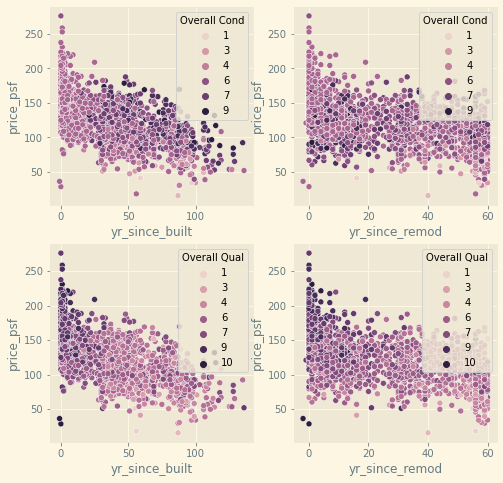

In [78]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))


sns.scatterplot(data = df_train_processed, x='yr_since_built', y='price_psf', ax=ax[0,0],
            hue='Overall Cond')
sns.scatterplot(data = df_train_processed, x='yr_since_remod', y='price_psf', ax=ax[0,1],
            hue='Overall Cond')
sns.scatterplot(data = df_train_processed, x='yr_since_built', y='price_psf', ax=ax[1,0],
            hue='Overall Qual')
sns.scatterplot(data = df_train_processed, x='yr_since_remod', y='price_psf', ax=ax[1,1],
            hue='Overall Qual')
ax[1,1].legend(loc="upper right", title='Overall Qual')


New and newly renovated properties do see higher prices.
If property owners wish to maximize their property value, they could make improvements, and hopefully we can help in this decision making process.


<AxesSubplot:xlabel='yr_since_remod', ylabel='price_psf'>

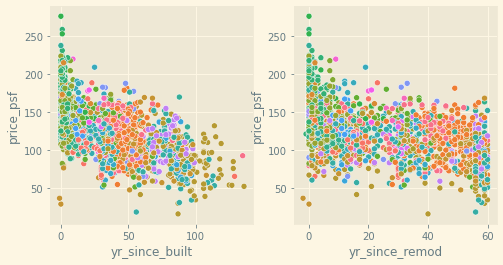

In [79]:
df = df_train_processed.join(df_train[['Neighborhood','MS Zoning']])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


sns.scatterplot(data = df, x='yr_since_built', y='price_psf', ax=ax[0],
            hue='Neighborhood',legend=None)
sns.scatterplot(data = df, x='yr_since_remod', y='price_psf', ax=ax[1],
            hue='Neighborhood',legend=None)

In [80]:
def cluster_corr(corr_array, inplace=False):
    """
    https://wil.yegelwel.com/cluster-correlation-matrix/
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]


<AxesSubplot:>

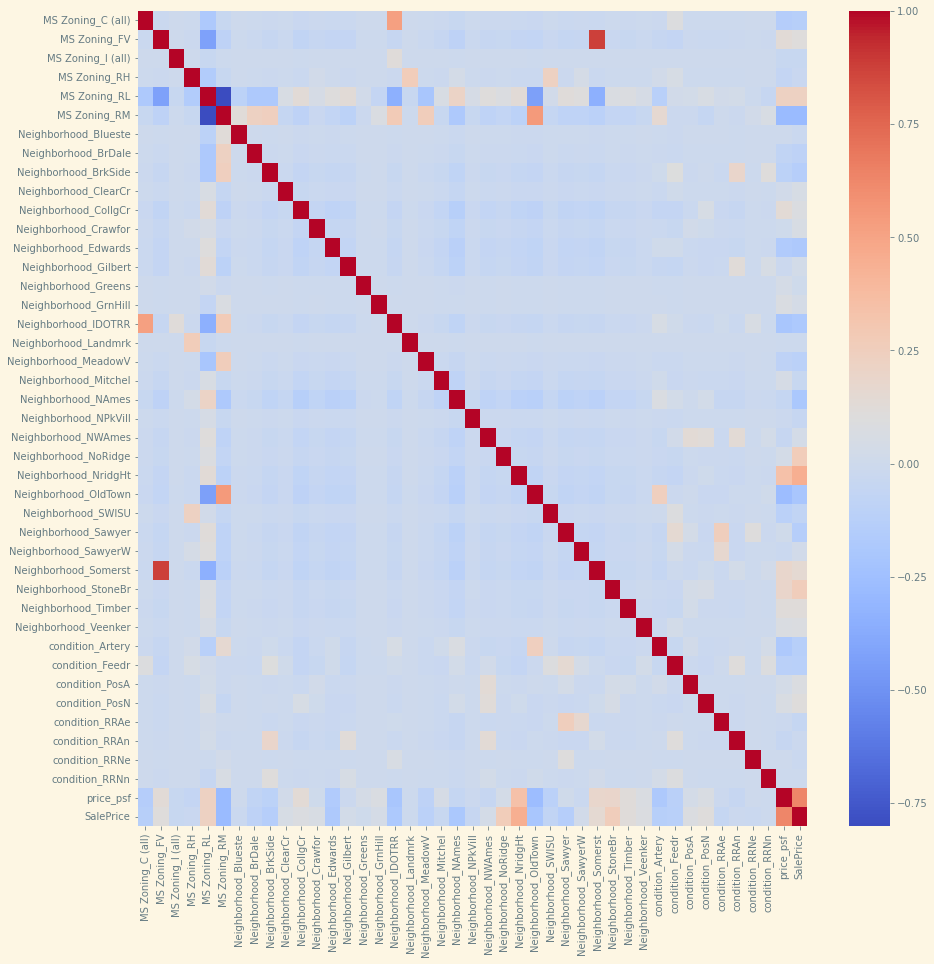

In [81]:
slicer = col_group_updated['location'] + ['price_psf'] +['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

MS zoning, Neighborhood seem more correlated with price than condition

<AxesSubplot:>

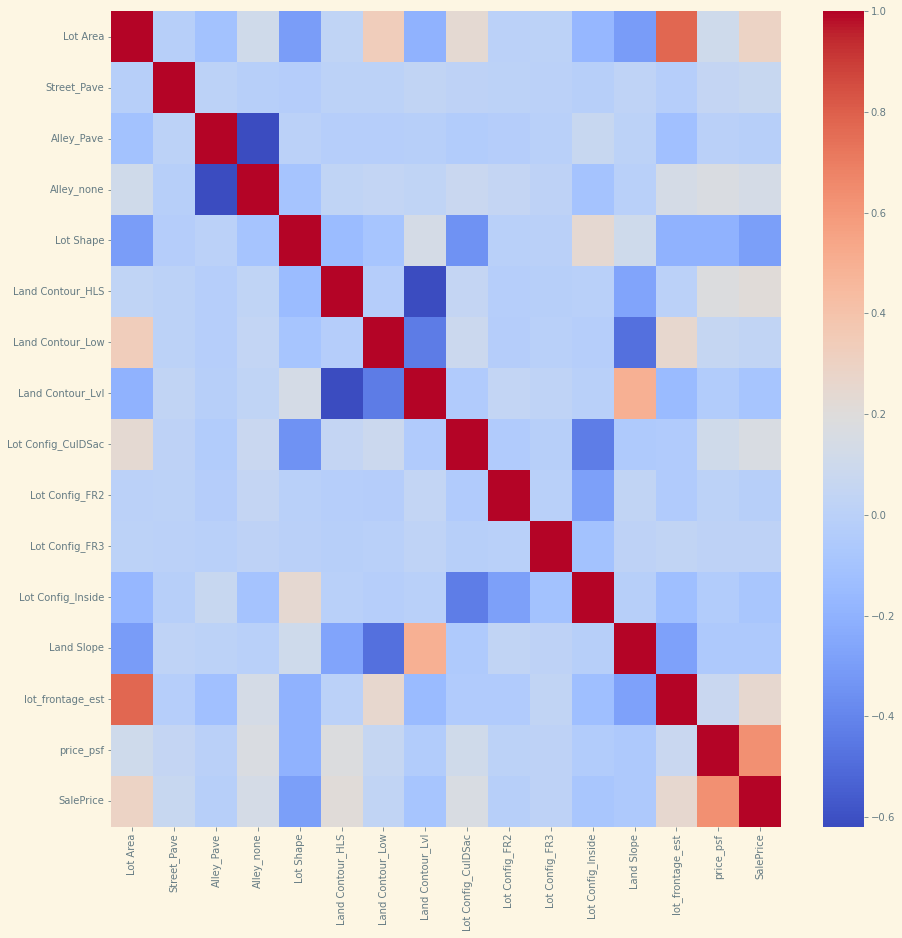

In [82]:
slicer = col_group_updated['land'] + ['price_psf'] + ['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

Lot shape strong inverse correlation with price

<AxesSubplot:>

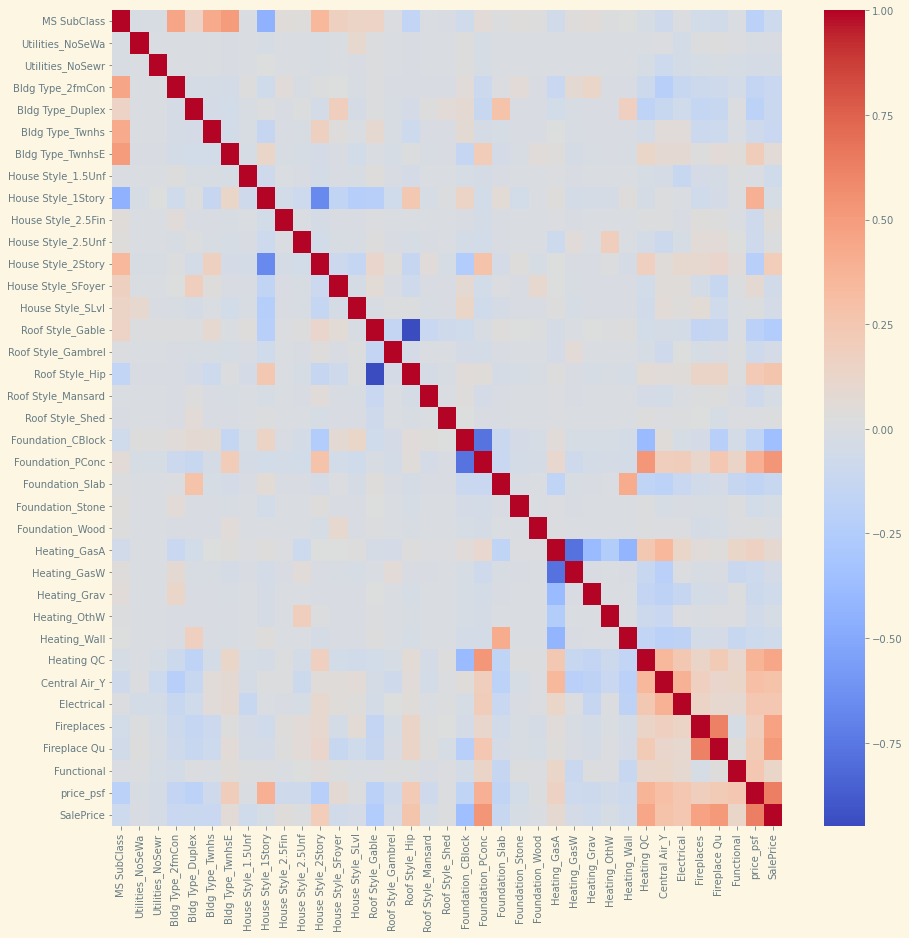

In [200]:
slicer = col_group_updated['structure'] + ['price_psf'] +['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

<AxesSubplot:>

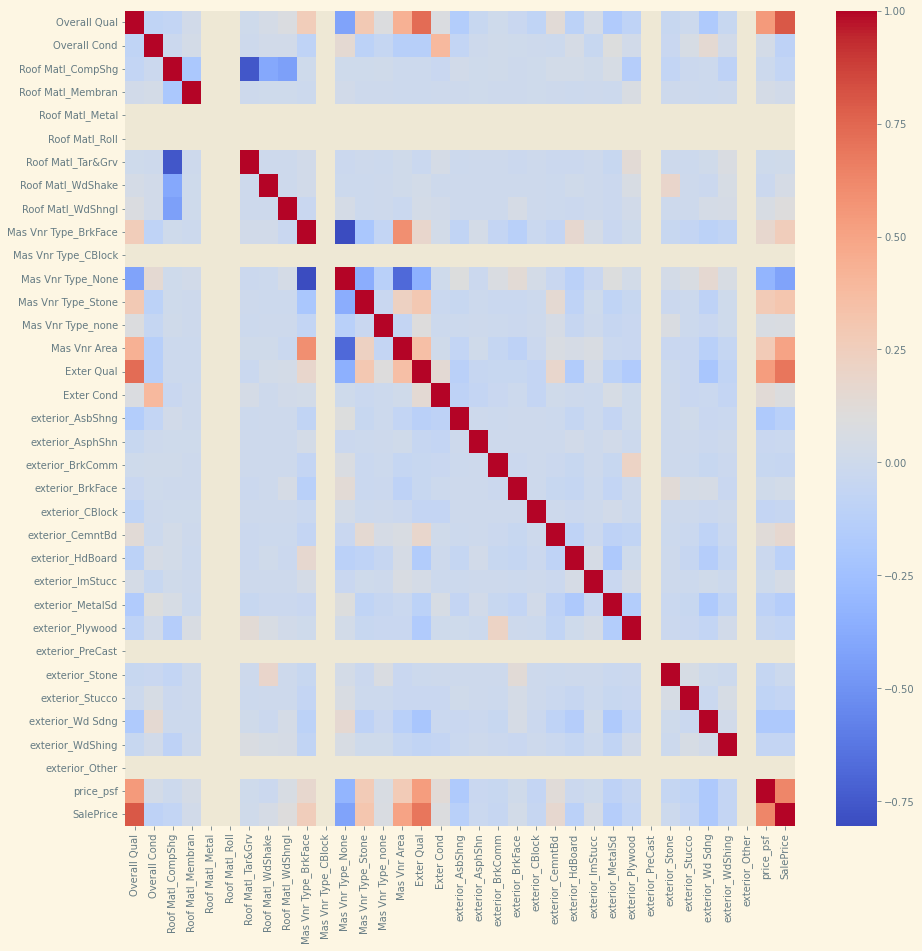

In [198]:
slicer = col_group_updated['finishings'] + ['price_psf'] +['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

Mas Vnr seems most correlated with sales price here

In [199]:
slicer = col_group_updated['liv_area'] + ['price_psf'] + ['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm',center=0

SyntaxError: unexpected EOF while parsing (3166497194.py, line 4)

<AxesSubplot:>

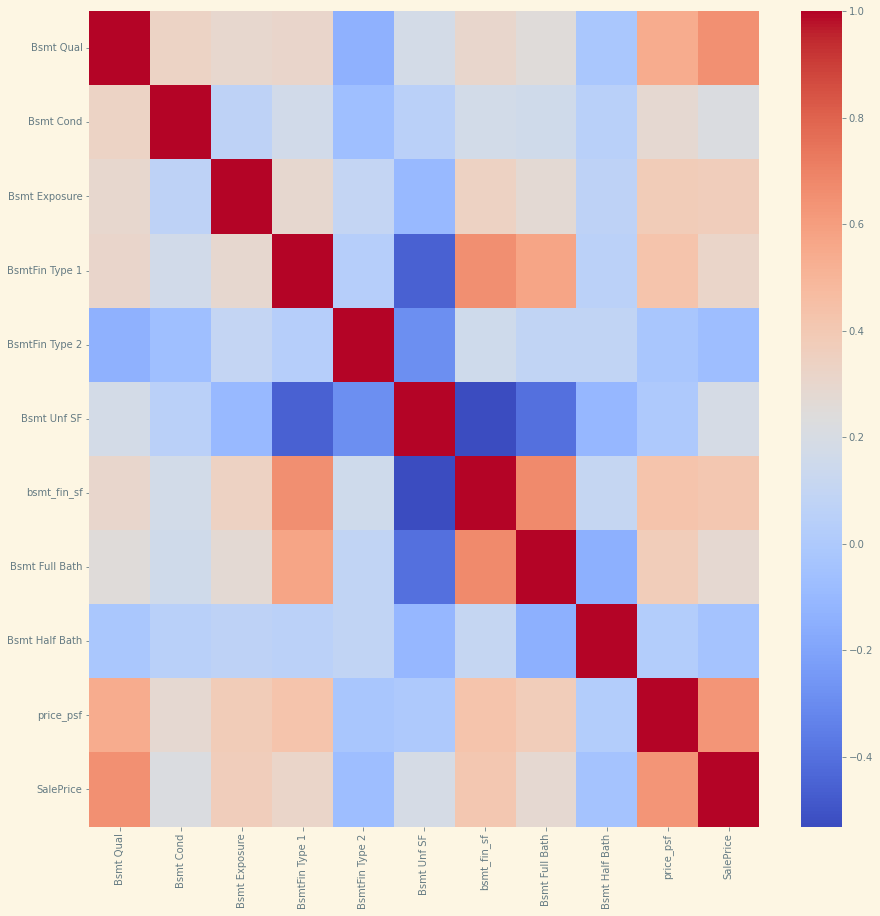

In [85]:
slicer = col_group_updated['basement'] +  ['price_psf'] +['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

<AxesSubplot:>

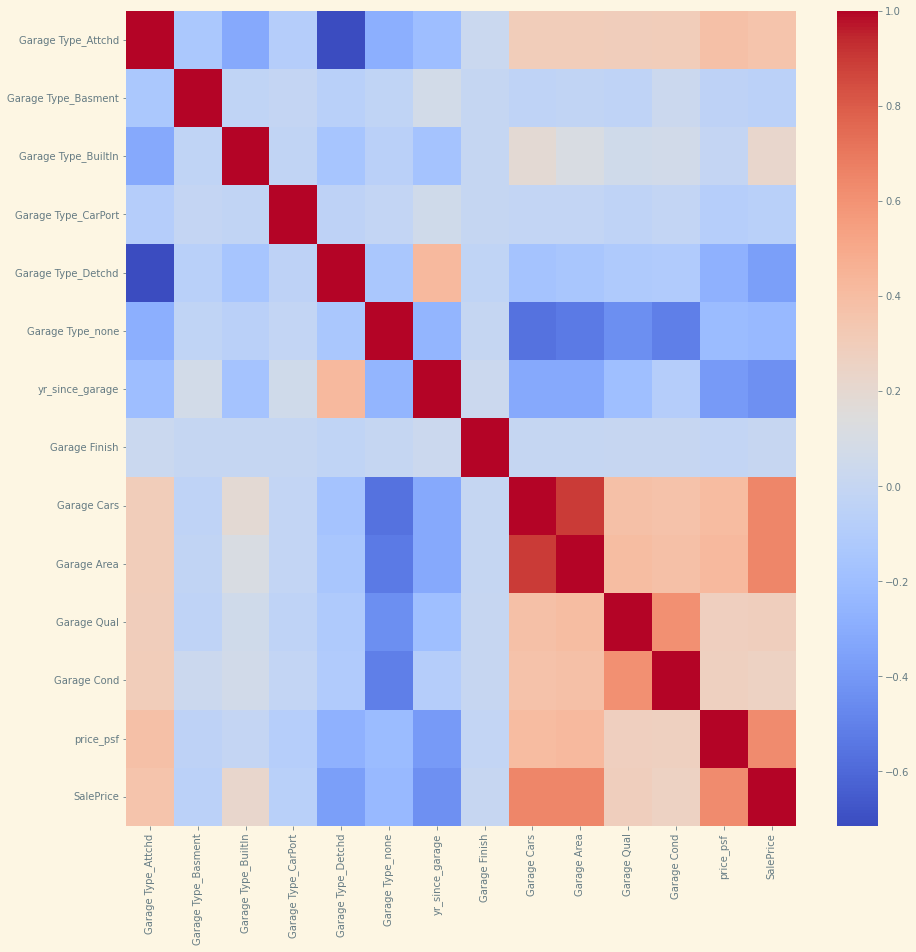

In [86]:
slicer = col_group_updated['garage'] +  ['price_psf'] +['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

<AxesSubplot:>

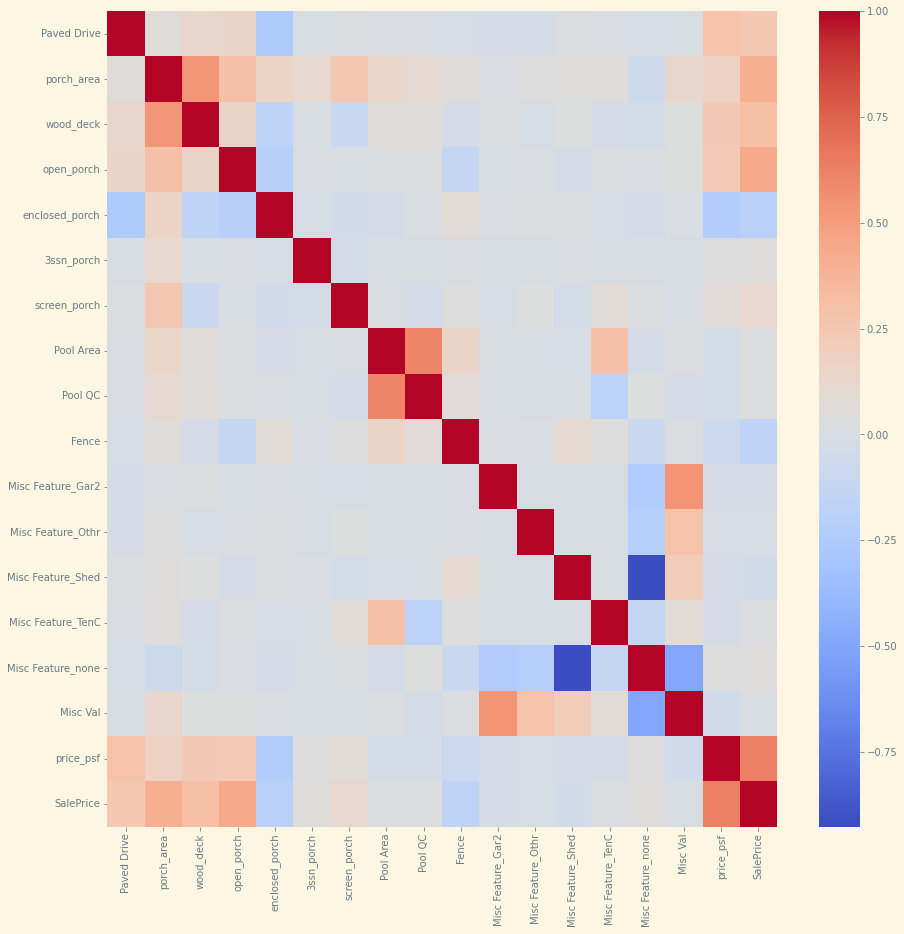

In [89]:
slicer = col_group_updated['external'] + ['price_psf'] +['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

<AxesSubplot:>

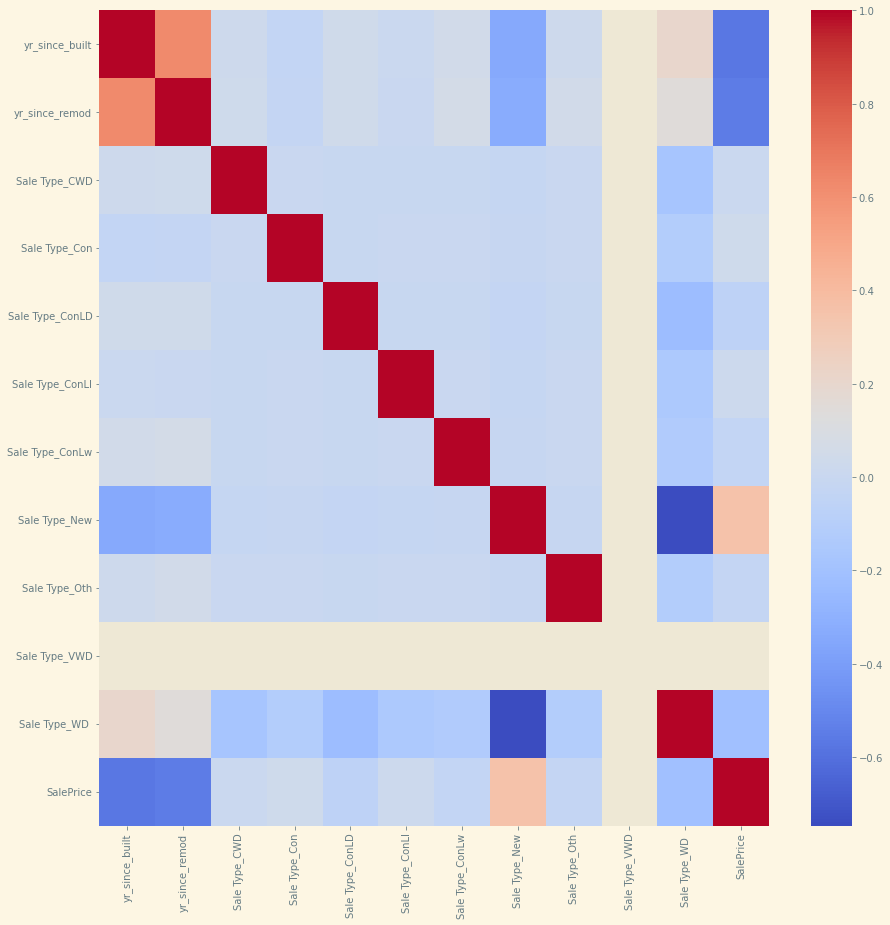

In [90]:
slicer = col_group_updated['age_sale'] + ['SalePrice']
df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')

''

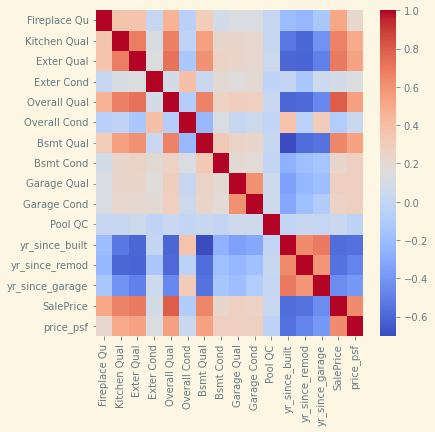

In [91]:
#Quality and age correlation
slicer = ['Fireplace Qu', 'Kitchen Qual','Exter Qual', 'Exter Cond','Overall Qual', 'Overall Cond',
'Bsmt Qual','Bsmt Cond','Garage Qual','Garage Cond','Pool QC', 'yr_since_built', 'yr_since_remod',
'yr_since_garage', 'SalePrice', 'price_psf']

df_corr = df_train_processed.loc[:,slicer].corr()
plt.figure(figsize=(6,6))
sns.heatmap(df_corr, annot=False, cmap='coolwarm')
;

In [131]:
#Area correlation
#plt.rcParams['figure.constrained_layout.use'] = True
df_train_processed.corr()[['SalePrice','price_psf']].sort_values(by='SalePrice', ascending=False)

#g = sns.heatmap(df_train_processed.corr()[['SalePrice','price_psf']].sort_values(by='SalePrice', ascending=False)
#                , cmap='coolwarm', center=0, annot=True, cbar=False)

SalePrice  price_psf
SalePrice             1.000000   0.631411
Overall Qual          0.800207   0.542463
Gr Liv Area           0.697038  -0.060475
Exter Qual            0.690534   0.532773
Kitchen Qual          0.661708   0.496567
...                        ...        ...
Roof Matl_Roll             NaN        NaN
Mas Vnr Type_CBlock        NaN        NaN
exterior_PreCast           NaN        NaN
exterior_Other             NaN        NaN
Sale Type_VWD              NaN        NaN

[184 rows x 2 columns]

### Model 1
Use RFE to select features 

#### Feature Selection
---

In [93]:
features = list(df_train_processed.columns)
features.remove('SalePrice')

In [94]:
X = df_train_processed[features]
y = df_train_processed['SalePrice']

In [95]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=100)
rfe_fit = rfe.fit(X, y)

In [96]:
rfe_df = pd.DataFrame(columns=['Feature', 'Ranking'])
rfe_df['Feature'] = X.columns
rfe_df['Ranking'] = rfe_fit.ranking_

In [97]:
rfe_df.sort_values(by='Ranking', ascending=True).head(40)
rfe_df[rfe_df['Feature']=='Gr Liv Area']

Feature  Ranking
126  Gr Liv Area       51

In [98]:
rfe_select_list = list(X.columns[rfe_fit.get_support()])
#rfe_select_list.append('Gr Liv Area')

In [99]:
df_combine_model1 = df_combine_processed[rfe_select_list]
df_train_model1 = df_combine_model1.loc['train',:]
df_test_model1 = df_combine_model1.loc['test',:]

#### Scaling, Train Test Split
---


In [100]:
X = df_train_model1
y = df_train_processed['SalePrice']

ss = StandardScaler()
# use the "fit_transform" function to standardize the X design matrix
X_scaled = ss.fit_transform(X)

In [101]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_scaled, y, random_state=42)

#### Instantiate models
---

In [187]:
def reg_models(X_train, y_train, X_test, y_test, testlabel='test'):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_scores_train = (-cross_val_score(lr, X_train, y_train, cv=5, 
                                       scoring='neg_root_mean_squared_error')).mean()    
    lr_scores_test = mean_squared_error(y_test, lr.predict(X_test), squared=False)
    
    ridge = RidgeCV(alphas=np.logspace(0, 5, 100), cv=5)
    ridge.fit(X_train, y_train)    
    ridge_scores_train = (-cross_val_score(ridge, X_train, y_train, cv=5, 
                                          scoring='neg_root_mean_squared_error')).mean()    
    ridge_best = Ridge(alpha=ridge.alpha_)
    ridge_best.fit(X_train, y_train)
    ridge_scores_test = mean_squared_error(y_test, ridge_best.predict(X_test), squared=False)
    
    lasso = LassoCV(n_alphas=200, cv=5)
    lasso.fit(X_train, y_train)  
    lasso_scores_train = (-cross_val_score(lasso, X_train, y_train, cv=5, 
                                          scoring='neg_root_mean_squared_error')).mean()
    lasso_best = Lasso(alpha=lasso.alpha_)
    lasso_best.fit(X_train, y_train)
    lasso_scores_test = mean_squared_error(y_test, lasso_best.predict(X_test), squared=False)
    
    enet = ElasticNetCV(l1_ratio=np.linspace(0.01, 1.0, 25), n_alphas=100, cv=5)
    enet.fit(X_train, y_train)
    enet_scores_train = (-cross_val_score(enet, X_train, y_train, cv=5, 
                                         scoring='neg_root_mean_squared_error')).mean()
    enet_best = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)
    enet_best.fit(X_train, y_train)
    enet_scores_test = mean_squared_error(y_test, enet_best.predict(X_test), squared=False)

    data = {'model':['LR', 'Ridge', 'Lasso', 'Enet'],
           'train':[lr_scores_train, ridge_scores_train, lasso_scores_train, enet_scores_train],
            testlabel:[lr_scores_test, ridge_scores_test, lasso_scores_test, enet_scores_test]
           }
    df = pd.DataFrame(data)
    
    print(f'RMSE result table:')
    print(df)
    
    return lr, ridge_best, lasso_best, enet_best, df


#### Model Evaluation
___

In [103]:
lr, ridge_best, lasso_best, enet_best, df_result = reg_models(X_train, y_train, X_holdout, y_holdout, 'holdout')

RMSE result table:
   model         train       holdout
0     LR  3.413732e+17  29884.351977
1  Ridge  2.876334e+04  29821.256028
2  Lasso  2.875117e+04  29732.110026
3   Enet  2.875405e+04  29731.406620


In [104]:
df_result[df_result['model']!='LR']

model         train       holdout
1  Ridge  28763.340065  29821.256028
2  Lasso  28751.165428  29732.110026
3   Enet  28754.049937  29731.406620

In [105]:
#getcoefs
coefs = pd.DataFrame({'variable':X.columns,
                            'coef':enet_best.coef_,
                            'abs_coef':np.abs(enet_best.coef_)})

coefs.sort_values('coef', inplace=True, ascending=False)

coefs[coefs['abs_coef']>0].head(20)

variable          coef      abs_coef
53          Overall Qual  17710.333224  17710.333224
74         TotRms AbvGrd  13874.263278  13874.263278
16  Neighborhood_NridgHt  10869.495776  10869.495776
77        Bsmt Full Bath   8543.986146   8543.986146
70             Full Bath   7957.256697   7957.256697
58            Exter Qual   7824.333703   7824.333703
19  Neighborhood_StoneBr   7766.097805   7766.097805
85           Garage Cars   7733.028058   7733.028058
76         Bsmt Exposure   7269.247427   7269.247427
15  Neighborhood_NoRidge   7094.151193   7094.151193
51            Fireplaces   7023.541017   7023.541017
73          Kitchen Qual   5811.299620   5811.299620
75             Bsmt Qual   5255.926656   5255.926656
41        Roof Style_Hip   4712.468344   4712.468344
57     Roof Matl_WdShngl   4536.698055   4536.698055
71             Half Bath   4143.179556   4143.179556
97         Sale Type_New   4100.328082   4100.328082
11  Neighborhood_GrnHill   3670.094917   3670.094917
88          screen_porch   3361.588342   3361.588342
7   Neighborhood_Crawfor   2984.674588   2984.674588

In [106]:
print ('Percent variables zeroed out:', np.sum((enet_best.coef_ == 0))/float(X.shape[0]))

Percent variables zeroed out: 0.010238907849829351


In [108]:
# Refit model on entire training dataset
X_scaled = ss.fit_transform(X)
enet = ElasticNetCV()
enet.fit(X_scaled, y)
enet.score(X_scaled,y)

0.14037745960983627

In [109]:
print('Total Features before ElasticNet regression:', len(rfe_select_list))
print('Features Zeroed by ElasticNet regression:', len(enet_best.coef_[enet_best.coef_ == 0]))
print('Features Remaining ElasticNet regression:', len(rfe_select_list) - len(enet_best.coef_[enet_best.coef_ == 0]))

Total Features before ElasticNet regression: 100
Features Zeroed by ElasticNet regression: 21
Features Remaining ElasticNet regression: 79


In [110]:
test = df_test_model1[rfe_select_list]

In [111]:
test_scaled = ss.transform(test)

In [112]:
final_predictions = enet_best.predict(test_scaled)

In [113]:
df_test['SalePrice']=final_predictions

In [114]:
# Create csv for submission
submission = df_test[['Id','SalePrice']]
submission.to_csv('./datasets/kaggle_submission.csv', index=False)

#View submission
submission.head()

Id      SalePrice
0  2658   93284.789121
1  2718  150569.743595
2  2414  247481.950577
3  1989  115376.193376
4   625  198664.986455

## Model 2

#### Feature Selection
---

In [344]:
psf_corr = df_train_processed.corr()[['SalePrice', 'Overall Qual', 'Gr Liv Area']].sort_values(by='SalePrice', ascending=False)
psf_corr1 = psf_corr#[(psf_corr['SalePrice']>=0.3) | (psf_corr['SalePrice']<=-0.3)]
psf_corr2 = psf_corr1#[(psf_corr1['Overall Qual']<=0.3) & (psf_corr1['Overall Qual']>=-0.3)]
psf_corr3 = psf_corr2[(psf_corr2['Gr Liv Area']<=0.5) & (psf_corr2['Gr Liv Area']>=-0.5)]
psf_corr3
#        & ((psf_corr['Overall Qual']<=0.5) | (psf_corr['Overall Qual']>=-0.5)) 
#        & ((psf_corr['Gr Liv Area']<=0.3) | (psf_corr['Gr Liv Area']>=-0.3))

SalePrice  Overall Qual  Gr Liv Area
Exter Qual           0.690534      0.725059     0.417915
Kitchen Qual         0.661708      0.668812     0.420744
Garage Area          0.650284      0.563817     0.490810
Bsmt Qual            0.648792      0.666991     0.375065
Garage Cars          0.648239      0.587437     0.486443
...                       ...           ...          ...
Garage Type_Detchd  -0.370140     -0.341073    -0.250874
Mas Vnr Type_None   -0.424088     -0.423722    -0.264825
yr_since_garage     -0.439278     -0.463538    -0.231776
yr_since_remod      -0.551716     -0.585798    -0.323631
yr_since_built      -0.571881     -0.602804    -0.259244

[170 rows x 3 columns]

In [345]:
model2_col = list(psf_corr3.index) + [
'MS Zoning_C (all)',
'MS Zoning_FV',
'MS Zoning_I (all)',
'MS Zoning_RH',
'MS Zoning_RL',
'MS Zoning_RM',
'Lot Shape','Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
'Foundation_Stone', 'Foundation_Wood',  
'Fireplaces', 'Fireplace Qu',
                            'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 
                           'Heating_OthW', 'Heating_Wall',
                           'Heating QC', 
                           'Central Air_Y',
                           'Electrical', 
                             'Mas Vnr Type_BrkFace', 'Mas Vnr Type_CBlock', 'Mas Vnr Type_None',
                            'Mas Vnr Type_Stone', 'Mas Vnr Type_none',
                            'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
                        'Bedroom AbvGr','Kitchen AbvGr',
                        '2nd Flr SF',
                        'wood_deck','open_porch','enclosed_porch',
                          '3ssn_porch', 'screen_porch',
'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn',
                             'Garage Type_CarPort', 'Garage Type_Detchd', 'Garage Type_none',
                        'yr_since_garage', 'Garage Finish', 'Garage Cars', 
                        'Garage Area', 'Garage Qual','Garage Cond',
    'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD', 
                             'Sale Type_ConLI','Sale Type_ConLw', 'Sale Type_New', 
                             'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
'yr_since_built', 'yr_since_remod', 
'large_house', 'Gr Liv Area'
]

#remove duplicates
model2_col=(list(set(model2_col)))

In [346]:
len(model2_col)

175

In [362]:
features = model2_col
#features.remove('SalePrice')

X = df_train_processed[features]
y = df_train_processed['SalePrice']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=100)
rfe_fit = rfe.fit(X, y)

rfe_df = pd.DataFrame(columns=['Feature', 'Ranking'])
rfe_df['Feature'] = X.columns
rfe_df['Ranking'] = rfe_fit.ranking_

rfe_df.sort_values(by='Ranking', ascending=True).head(40)


Feature  Ranking
87    Neighborhood_NWAmes        1
121          MS Zoning_RM        1
120            3ssn_porch        1
119     Foundation_CBlock        1
118     Roof Matl_WdShake        1
112  Neighborhood_CollgCr        1
109       exterior_Stucco        1
108  Neighborhood_NPkVill        1
102       Sale Type_ConLw        1
101    Neighborhood_NAmes        1
98         Lot Config_FR2        1
97             Fireplaces        1
96      Misc Feature_TenC        1
95     Garage Type_Attchd        1
122         Sale Type_WD         1
94     Roof Style_Mansard        1
92       exterior_BrkComm        1
91            Paved Drive        1
89    Garage Type_BuiltIn        1
88                Pool QC        1
86         Bsmt Full Bath        1
79     Neighborhood_SWISU        1
78         condition_RRAe        1
76       Bldg Type_TwnhsE        1
75   Neighborhood_Gilbert        1
74      Misc Feature_Shed        1
72   Neighborhood_NoRidge        1
70      Mas Vnr Type_None        1
69       Bldg Type_Duplex        1
93           MS Zoning_RL        1
67          Bsmt Exposure        1
124    House Style_2.5Unf        1
127         Bedroom AbvGr        1
172      Garage Type_none        1
171    House Style_SFoyer        1
168   Neighborhood_Timber        1
167            Exter Qual        1
165        condition_RRNe        1
164  Neighborhood_Veenker        1
162  Neighborhood_Mitchel        1

In [363]:
rfe_select_list = list(X.columns[rfe_fit.get_support()])

In [364]:
df_combine_model2 = df_combine_processed[rfe_select_list]
df_train_model2 = df_combine_model2.loc['train',:]
df_test_model2 = df_combine_model2.loc['test',:]

#### Scaling
___

In [365]:
X = df_train_model2
y = df_train_processed['SalePrice']

ss = StandardScaler()
# use the "fit_transform" function to standardize the X design matrix
X_scaled = ss.fit_transform(X)

In [366]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### Instantiate Model & Model Evaluation
___

In [368]:
lr, ridge_best, lasso_best, enet_best, df_result = reg_models(X_train, y_train, X_holdout, y_holdout, 'holdout')

RMSE result table:
   model         train       holdout
0     LR  1.374012e+17  3.321884e+17
1  Ridge  3.224874e+04  3.299009e+04
2  Lasso  3.228157e+04  3.317253e+04
3   Enet  3.228378e+04  3.316861e+04


In [371]:
#getcoefs
coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso_best.coef_,
                            'abs_coef':np.abs(lasso_best.coef_)})

coefs.sort_values('coef', inplace=True, ascending=False)

coefs[coefs['abs_coef']>0]

variable          coef      abs_coef
95            Exter Qual  13031.105329  13031.105329
19  Neighborhood_NridgHt  12716.938383  12716.938383
18           Garage Cars  12337.998123  12337.998123
56            Fireplaces  11520.783106  11520.783106
21  Neighborhood_StoneBr  10167.227269  10167.227269
..                   ...           ...           ...
85           large_house  -5483.758654   5483.758654
1   Neighborhood_Edwards  -5567.900486   5567.900486
58    Neighborhood_NAmes  -7032.478837   7032.478837
0        Bldg Type_Twnhs  -7167.464975   7167.464975
43      Bldg Type_TwnhsE -11591.053589  11591.053589

[92 rows x 3 columns]

In [372]:
lasso_best.coef_

array([ -7167.4649753 ,  -5567.90048622,  -1351.44312593,      0.        ,
          676.8049451 ,  -1862.97348906,   7648.23931898,   1225.07746246,
        -2675.72544276,   -535.97765345,     -0.        ,   1430.22830349,
         3140.12728768,   9759.398888  ,  -3558.43260779,  -2289.93815682,
         3129.09923138,   1004.52578748,  12337.99812264,  12716.93838318,
         -102.81747898,  10167.22726902,   1286.08777683,  -4528.86321998,
         1951.57452317,  -1281.68343955,   5201.46121276,    538.91916855,
            0.        ,    540.31361617,   1381.98508752,      0.        ,
        -1242.30156242,   6498.88981648,   -530.69426516,      0.        ,
         1281.21255068,   8626.10538208,  -1003.63981615,  -1779.08416669,
         6659.7015741 ,      0.        ,  -4829.15223689, -11591.0535889 ,
        -1659.55320959,   -787.66155202,   7706.96503693,  -1480.05832092,
         -378.47514404,   2312.01805687,   2440.06388521,     -0.        ,
           -0.        ,  

In [373]:
# Refit model on entire training dataset
X_scaled = ss.fit_transform(X)
lasso = LassoCV()
lasso.fit(X_scaled, y)
lasso.score(X_scaled, y)

0.8543034115380335

In [374]:
print('Total Features before Lasso regression:', len(model2_col))
print('Features Zeroed by Lasso regression:', len(lasso_best.coef_[lasso_best.coef_ == 0]))
print('Features Remaining after Lasso regression:', len(model2_col) - len(lasso_best.coef_[lasso_best.coef_ == 0]))

Total Features before Lasso regression: 175
Features Zeroed by Lasso regression: 8
Features Remaining after Lasso regression: 167


In [375]:
test = df_test_model2
test_scaled = ss.transform(test)
final_predictions = enet_best.predict(test_scaled)
df_test['SalePrice']=final_predictions

In [376]:
# Create csv for submission
submission = df_test[['Id','SalePrice']]

In [377]:
submission.to_csv('./datasets/kaggle_submission_9.csv', index=False)

In [378]:
submission.head()

Id      SalePrice
0  2658   49488.889088
1  2718  148873.763199
2  2414  242580.098452
3  1989  113880.682008
4   625  209367.501309

## Conclusion
---

Results for the second model are not as good as compared to the first model using RFE feature selection.
Further investigation needed to reduce collinearity between categorical variables (e.g. Chi-Square test)

Coefficients of the regression can be used to inform home owner's renovation plans as to whether they have the potential to be cost-effective. We could expand the project further and develop an automated renovation advisor:

- Input features of home
- Identify possible improvements and calculate value added to property
- Compare with cost of improvement
- Propose vendors if there is net cost-benefit

Other areas of studies

- Logistic regression/classification study: what features will more likely be perceived as ‘high quality’
- Investigate how location affects price by measuring distance from amenities/city center
